# Data Sci Eng Methods
## Assignment 1 – ML Data Cleaning and Feature Selection
### ML Data Cleaning and Feature Selection


In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.



__Answer the following questions:__

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.


For categorical data, calculate the accuracy and a confusion matrix.
 

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1uboLinks to an external site.


Minimize Video
Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonLinks to an external site.


<img src="image.png" alt="Local Image" style="width:80%;"/>


__Scoring Rubric__

1. Are my answers supported with data? (20 Points)

  * Tables, graphs, and charts must support your evaluation/answers.

  * It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas . (5 Points)

 

2. Public dataset (5 Points)

  * Pick a public dataset that can be used for Regression or Classification. You MUST get approval for your dataset from the TAs.

 

3. What code is yours and what have you adapted? (5 Points)

  * You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

 

4. Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

 

5. Did I explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

 

__Answers to listed questions (45 Points)__

 

* Which independent variables are useful to predict a target (dependent variable)?


* Which independent variable have missing data? How much? 


* Do the training and test sets have the same data?


* In the predictor variables independent of all the other predictor variables?


* Which predictor variables are the most important?


* Do the ranges of the predictor variables make sense?


* What are the distributions of the predictor variables?   




__Notes:__


__Normality -__ When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

__Homoscedasticity -__ I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013)Links to an external site.. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

__Linearity -__ The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

__Absence of correlated errors -__ Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

## Data Set Overview

The provided data set captures detailed information related to Fantasy Premier League (FPL) player statistics for seasons spanning 2016 to 2023. This dataset is sourced from Fantasy-Premier-League and encompasses diverse features that contribute to understanding player performance in the English Premier League.


**Key Features:**
- **Player Details:**
  - `season_x`: The season for which the data is recorded.
  - `name`: Player names.
  - `position`: Player positions.
  - `team_x`: The team to which the player belongs.

- **Player Performance Metrics:**
  - A wide range of metrics, including `assists`, `bonus`, `bps`, `clean_sheets`, `creativity`, `influence`, `threat`, and more.
  - `total_points`: The total Fantasy Premier League points earned by the player.

- **Match and Team Details:**
  - Fixture information, kickoff time, minutes played, opponent team details, and scores.

- **Miscellaneous Player Details:**
  - Metrics related to player actions, such as `own_goals`, `penalties_missed`, `penalties_saved`, `red_cards`, `yellow_cards`, etc.

- **Statistical and Outcome Metrics:**
  - `total_points`: The primary dependent variable representing the total Fantasy Premier League points earned by the player.

**Dataset Overview:**
- The dataset comprises 96169 observations, each capturing a player's performance in various matches.
- Independent variables include a rich set of features, ranging from player statistics and team details to match-related metrics.
- The dependent variable is `total_points`, representing the total Fantasy Premier League points earned by the player.

#### MIT License

__Copyright (c) 2024 Vismay Devjee__

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [2]:
# installing dependencies
!pip install eli5


In [44]:
pip install fancyimpute


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/38/85/5f46779431dd978f62a1f5bd64df05d9a1418cc50d7294e98bf445e31068/cvxpy-1.4.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/a3/52/2237d72cf007e6c36367ab8a776388a9f13511e4cfa8a71b79101ad6e0fa/cvxopt-1.3.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.7 kB ? eta -:--:--
     --------------- ----------------------- 61.4/154.7 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 154.7/154.7 kB 4.5 MB/s eta 0:00:00
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/23/46/232041be3d85624ec4c20b3bdb8bd4bfb6640851901db15591

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm #For OLS method
import matplotlib.pylab as plt
from matplotlib import pyplot

In [4]:
# Reading the dataset
file_path = r"C:\Users\visma\INFO6105\Fantasy Football\Assignment1\cleaned_merged_seasons.csv"

# Read the CSV file
data = pd.read_csv(file_path)


C:\Users\visma\AppData\Local\Temp\ipykernel_24072\2784185952.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


##### Importing the necessary libraries and data set. Viewing the coloumn headers as shown below.

In [13]:
data.head()

season_x                name position team_x  assists  bonus  bps  \
0  2016-17     Aaron Cresswell      DEF    NaN        0      0    0   
1  2016-17        Aaron Lennon      MID    NaN        0      0    6   
2  2016-17        Aaron Ramsey      MID    NaN        0      0    5   
3  2016-17  Abdoulaye Doucouré      MID    NaN        0      0    0   
4  2016-17        Adam Forshaw      MID    NaN        0      0    3   

   clean_sheets  creativity  element  ...  team_h_score  threat  total_points  \
0             0         0.0      454  ...           2.0     0.0             0   
1             0         0.3      142  ...           1.0     0.0             1   
2             0         4.9       16  ...           3.0    23.0             2   
3             0         0.0      482  ...           1.0     0.0             0   
4             0         1.3      286  ...           1.0     0.0             1   

   transfers_balance  transfers_in transfers_out  value  was_home  \
0                  0             0             0     55     False   
1                  0             0             0     60      True   
2                  0             0             0     80      True   
3                  0             0             0     50     False   
4                  0             0             0     45      True   

  yellow_cards  GW  
0            0   1  
1            0   1  
2            0   1  
3            0   1  
4            1   1  

[5 rows x 37 columns]

### Q1. What are the data types? (Only numeric and categorical)


In [5]:
# Rename the 'bps' column to 'bonus_points'
data.rename(columns={'bps': 'bonus_points'}, inplace=True)

Renamed column 'bps' as 'Bonus Points'

In [15]:
# Get dimensions of a data 
data.shape

(96169, 37)

In [16]:
data.dtypes

season_x              object
name                  object
position              object
team_x                object
assists                int64
bonus                  int64
bonus_points           int64
clean_sheets           int64
creativity           float64
element                int64
fixture                int64
goals_conceded         int64
goals_scored           int64
ict_index            float64
influence            float64
kickoff_time          object
minutes                int64
opponent_team          int64
opp_team_name         object
own_goals              int64
penalties_missed       int64
penalties_saved        int64
red_cards              int64
round                  int64
saves                  int64
selected               int64
team_a_score         float64
team_h_score         float64
threat               float64
total_points           int64
transfers_balance      int64
transfers_in           int64
transfers_out          int64
value                  int64
was_home      

Here's a breakdown of the columns into __categorical__ and __numerical data__:

**Categorical Data:**
1. `season_x` (object)
2. `name` (object)
3. `position` (object)
4. `team_x` (object)
5. `kickoff_time` (object)
6. `opp_team_name` (object)
7. `was_home` (bool)

**Numerical Data:**
1. `assists` (int64)
2. `bonus` (int64)
3. `bonus_points` (int64)
4. `clean_sheets` (int64)
5. `creativity` (float64)
6. `element` (int64)
7. `fixture` (int64)
8. `goals_conceded` (int64)
9. `goals_scored` (int64)
10. `ict_index` (float64)
11. `influence` (float64)
12. `minutes` (int64)
13. `opponent_team` (int64)
14. `own_goals` (int64)
15. `penalties_missed` (int64)
16. `penalties_saved` (int64)
17. `red_cards` (int64)
18. `round` (int64)
19. `saves` (int64)
20. `selected` (int64)
21. `team_a_score` (float64)
22. `team_h_score` (float64)
23. `threat` (float64)
24. `total_points` (int64)
25. `transfers_balance` (int64)
26. `transfers_in` (int64)
27. `transfers_out` (int64)
28. `value` (int64)
29. `yellow_cards` (int64)
30. `GW` (int64)

This categorization is based on the data types of each column. Columns with data type `object` are considered categorical, while columns with data types `int64`, `float64`, and `bool` are considered numerical.

In [17]:
data.describe()

assists         bonus  bonus_points  clean_sheets    creativity  \
count  96169.000000  96169.000000  96169.000000  96169.000000  96169.000000   
mean       0.041042      0.108715      6.080275      0.106739      4.734000   
std        0.215378      0.492334      9.850595      0.308783     10.689879   
min        0.000000      0.000000    -21.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000     10.000000      0.000000      2.400000   
max        4.000000      3.000000    128.000000      1.000000    170.900000   

            element       fixture  goals_conceded  goals_scored     ict_index  \
count  96169.000000  96169.000000    96169.000000  96169.000000  96169.000000   
mean     327.063264    198.413824        0.495887      0.045514      1.715793   
std      194.313766    108.884200        0.974269      0.233644      3.042551   
min        1.000000      1.000000        0.000000      0.000000      0.000000   
25%      159.000000    105.000000        0.000000      0.000000      0.000000   
50%      318.000000    203.000000        0.000000      0.000000      0.000000   
75%      486.000000    293.000000        1.000000      0.000000      2.500000   
max      778.000000    380.000000        9.000000      4.000000     32.800000   

       ...  team_a_score  team_h_score        threat  total_points  \
count  ...  96169.000000  96169.000000  96169.000000  96169.000000   
mean   ...      1.265158      1.516393      5.287598      1.379270   
std    ...      1.229086      1.349184     13.368420      2.542535   
min    ...      0.000000      0.000000      0.000000     -7.000000   
25%    ...      0.000000      1.000000      0.000000      0.000000   
50%    ...      1.000000      1.000000      0.000000      0.000000   
75%    ...      2.000000      2.000000      2.000000      2.000000   
max    ...      7.000000      9.000000    186.000000     29.000000   

       transfers_balance  transfers_in  transfers_out         value  \
count       9.616900e+04  9.616900e+04   9.616900e+04  96169.000000   
mean        1.677100e+03  1.454716e+04   1.286945e+04     51.352390   
std         6.581628e+04  5.725343e+04   4.840128e+04     12.667432   
min        -2.180978e+06  0.000000e+00   0.000000e+00     37.000000   
25%        -1.374000e+03  4.600000e+01   1.280000e+02     44.000000   
50%        -5.800000e+01  4.380000e+02   1.104000e+03     48.000000   
75%         7.900000e+01  5.042000e+03   7.562000e+03     54.000000   
max         1.983733e+06  2.104464e+06   2.233619e+06    133.000000   

       yellow_cards            GW  
count  96169.000000  96169.000000  
mean       0.053167     20.772099  
std        0.224367     10.941742  
min        0.000000      1.000000  
25%        0.000000     11.000000  
50%        0.000000     22.000000  
75%        0.000000     30.000000  
max        1.000000     38.000000  

[8 rows x 30 columns]

### Q2. Are there missing values?

In [14]:
data.rename(columns={'team_x': 'team_name'}, inplace=True)

In [19]:
# checking if the any data is missing
data.isnull().sum()

season_x                 0
name                     0
position                 0
team_name            19852
assists                  0
bonus                    0
bonus_points             0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

### Since 'team_name' has _20.64%_ of missing data we will drop the rows which do not have a team name

In [15]:
df = data.copy()


In [16]:
df.head()

season_x                name position team_name  assists  bonus  \
0  2016-17     Aaron Cresswell      DEF       NaN        0      0   
1  2016-17        Aaron Lennon      MID       NaN        0      0   
2  2016-17        Aaron Ramsey      MID       NaN        0      0   
3  2016-17  Abdoulaye Doucouré      MID       NaN        0      0   
4  2016-17        Adam Forshaw      MID       NaN        0      0   

   bonus_points  clean_sheets  creativity  element  ...  team_h_score  threat  \
0             0             0         0.0      454  ...           2.0     0.0   
1             6             0         0.3      142  ...           1.0     0.0   
2             5             0         4.9       16  ...           3.0    23.0   
3             0             0         0.0      482  ...           1.0     0.0   
4             3             0         1.3      286  ...           1.0     0.0   

   total_points  transfers_balance  transfers_in transfers_out  value  \
0             0                  0             0             0     55   
1             1                  0             0             0     60   
2             2                  0             0             0     80   
3             0                  0             0             0     50   
4             1                  0             0             0     45   

   was_home yellow_cards  GW  
0     False            0   1  
1      True            0   1  
2      True            0   1  
3     False            0   1  
4      True            1   1  

[5 rows x 37 columns]

In [17]:
# Dropping the rows with 'team_name' as null
df.dropna(subset=["team_name"], inplace=True)

In [18]:
df.head()

season_x                name position      team_name  assists  bonus  \
19852  2020-21      Aaron Connolly      FWD       Brighton        0      0   
19853  2020-21     Aaron Cresswell      DEF       West Ham        0      0   
19854  2020-21          Aaron Mooy      MID       Brighton        0      0   
19855  2020-21      Aaron Ramsdale       GK  Sheffield Utd        0      0   
19856  2020-21  Abdoulaye Doucouré      MID        Everton        0      0   

       bonus_points  clean_sheets  creativity  element  ...  team_h_score  \
19852            -3             0         0.3       78  ...           1.0   
19853            11             0        11.2      435  ...           0.0   
19854             0             0         0.0       60  ...           1.0   
19855            12             0         0.0      483  ...           0.0   
19856            20             1        44.6      512  ...           0.0   

       threat  total_points  transfers_balance  transfers_in transfers_out  \
19852    32.0             1                  0             0             0   
19853     0.0             1                  0             0             0   
19854     0.0             0                  0             0             0   
19855     0.0             1                  0             0             0   
19856     4.0             3                  0             0             0   

       value  was_home yellow_cards  GW  
19852     55      True            0   1  
19853     50      True            0   1  
19854     50      True            0   1  
19855     50      True            0   1  
19856     55     False            0   1  

[5 rows x 37 columns]

In [19]:
df.isnull().sum()

season_x             0
name                 0
position             0
team_name            0
assists              0
bonus                0
bonus_points         0
clean_sheets         0
creativity           0
element              0
fixture              0
goals_conceded       0
goals_scored         0
ict_index            0
influence            0
kickoff_time         0
minutes              0
opponent_team        0
opp_team_name        0
own_goals            0
penalties_missed     0
penalties_saved      0
red_cards            0
round                0
saves                0
selected             0
team_a_score         0
team_h_score         0
threat               0
total_points         0
transfers_balance    0
transfers_in         0
transfers_out        0
value                0
was_home             0
yellow_cards         0
GW                   0
dtype: int64

### Q3. What are the likely distributions of the numeric variables?

**Numerical Data:**
1. `assists` (int64)
2. `bonus` (int64)
3. `bonus_points` (int64)
4. `clean_sheets` (int64)
5. `creativity` (float64)
6. `element` (int64)
7. `fixture` (int64)
8. `goals_conceded` (int64)
9. `goals_scored` (int64)
10. `ict_index` (float64)
11. `influence` (float64)
12. `minutes` (int64)
13. `opponent_team` (int64)
14. `own_goals` (int64)
15. `penalties_missed` (int64)
16. `penalties_saved` (int64)
17. `red_cards` (int64)
18. `round` (int64)
19. `saves` (int64)
20. `selected` (int64)
21. `team_a_score` (float64)
22. `team_h_score` (float64)
23. `threat` (float64)
24. `total_points` (int64)
25. `transfers_balance` (int64)
26. `transfers_in` (int64)
27. `transfers_out` (int64)
28. `value` (int64)
29. `yellow_cards` (int64)
30. `GW` (int64)

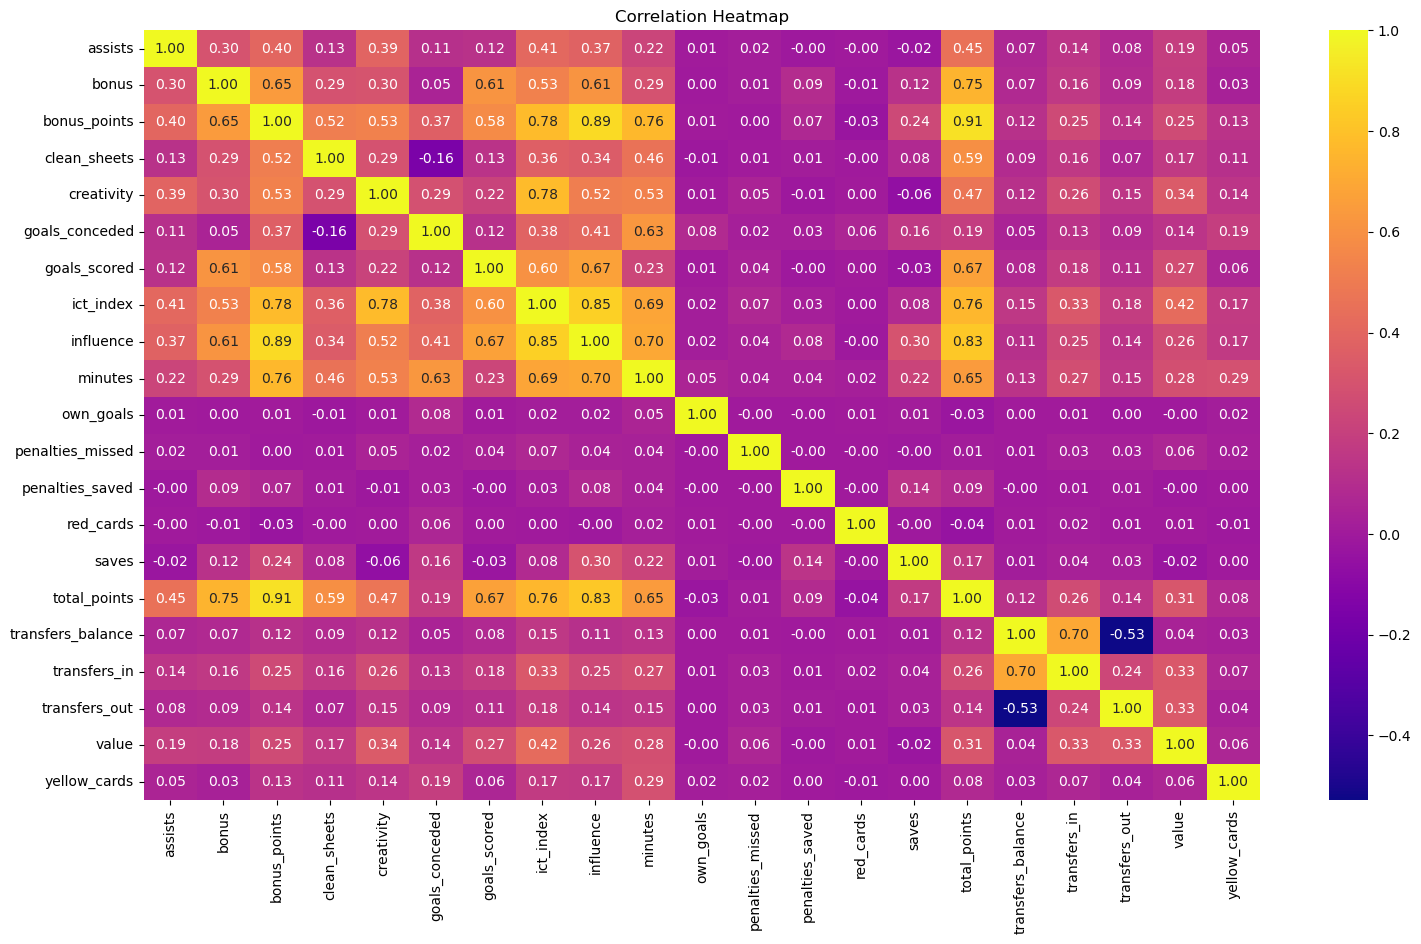

In [25]:
cols = ['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value', 'yellow_cards']
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

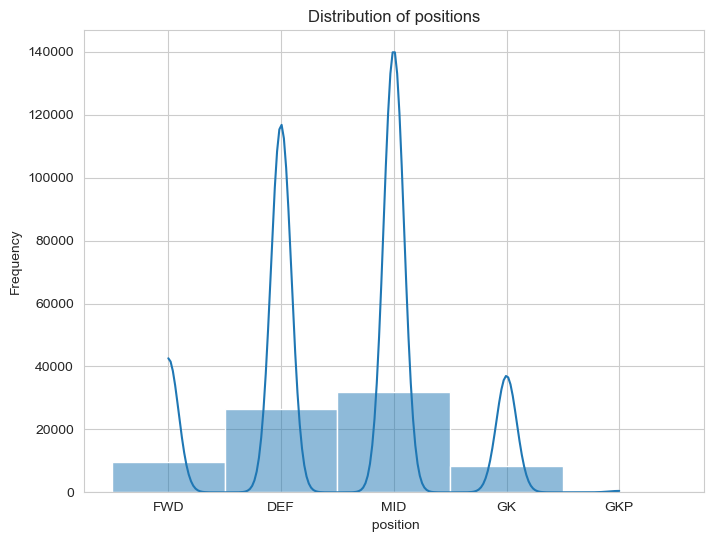

In [26]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='position', bins=5, kde=True)
plt.xlabel(' position')
plt.ylabel('Frequency')
plt.title('Distribution of positions')
plt.show()

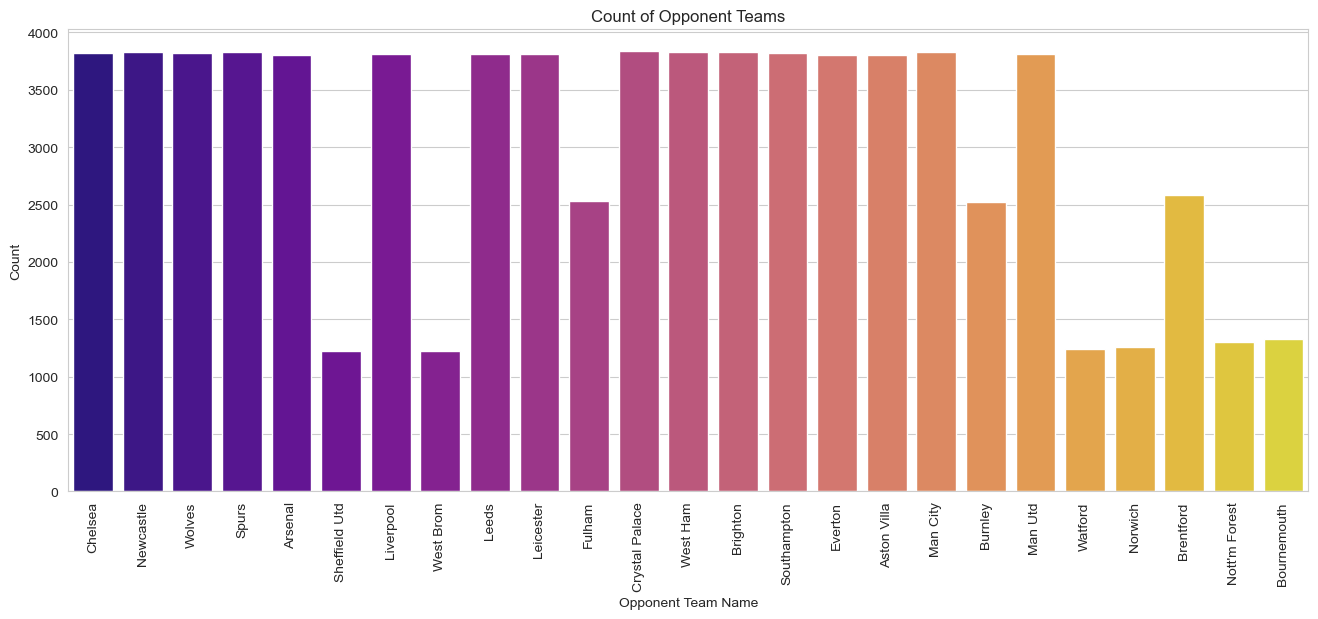

In [27]:
color_palette = "plasma"

plt.figure(figsize=(16, 6))  
sns.countplot(data=df, x='opp_team_name',palette=color_palette)

plt.xticks(rotation=90)
plt.xlabel('Opponent Team Name')
plt.ylabel('Count')
plt.title('Count of Opponent Teams')
plt.show()

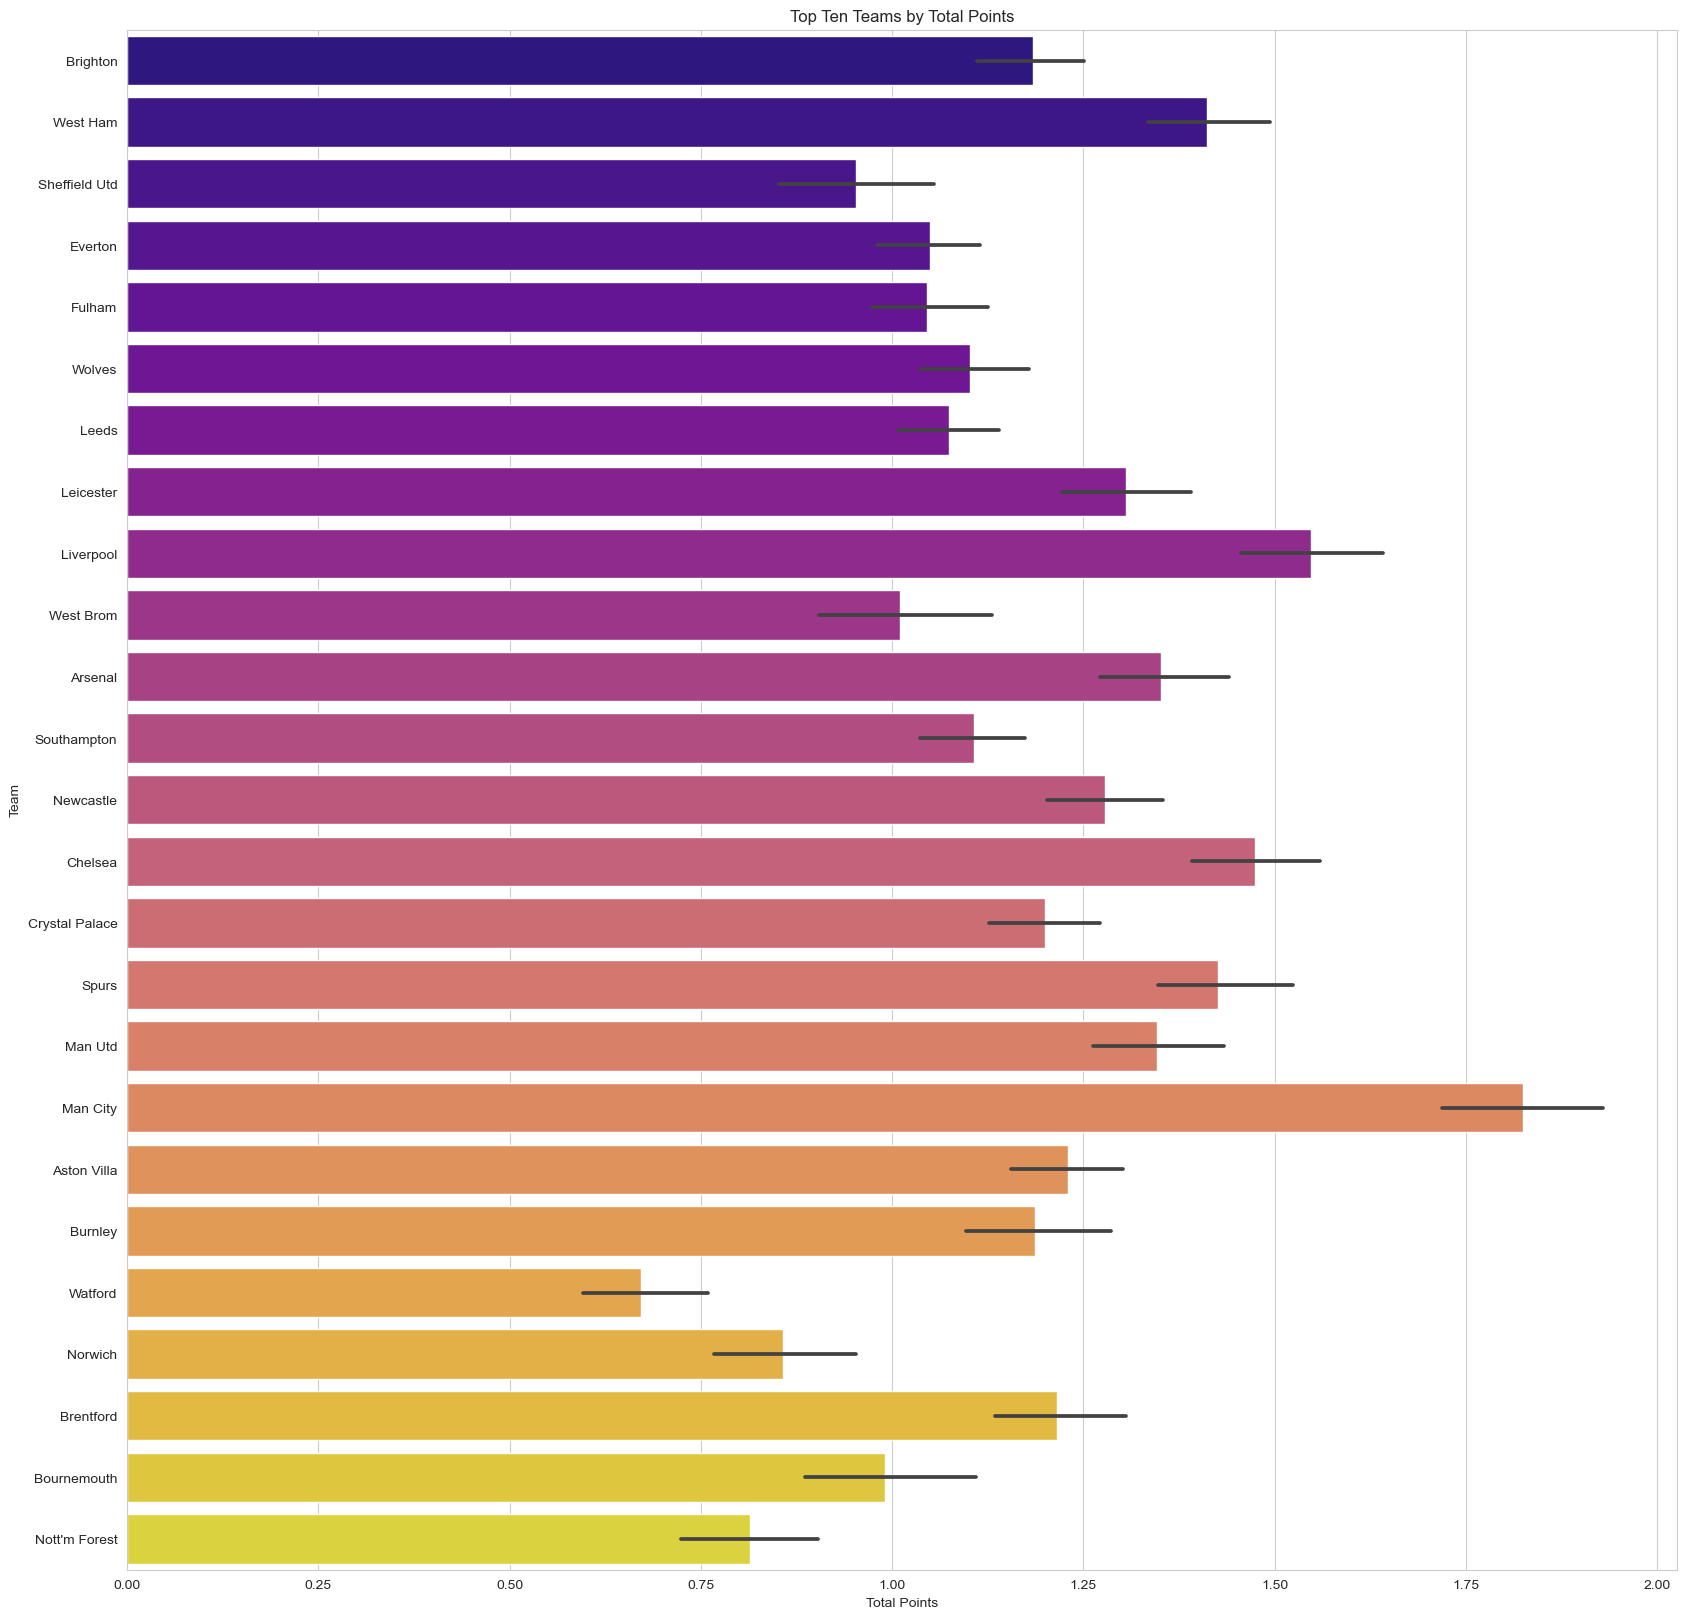

In [28]:
color_palette = "plasma"

# Create the bar plot
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='total_points', y='team_name', palette=color_palette)

plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Top Ten Teams by Total Points')
plt.show()

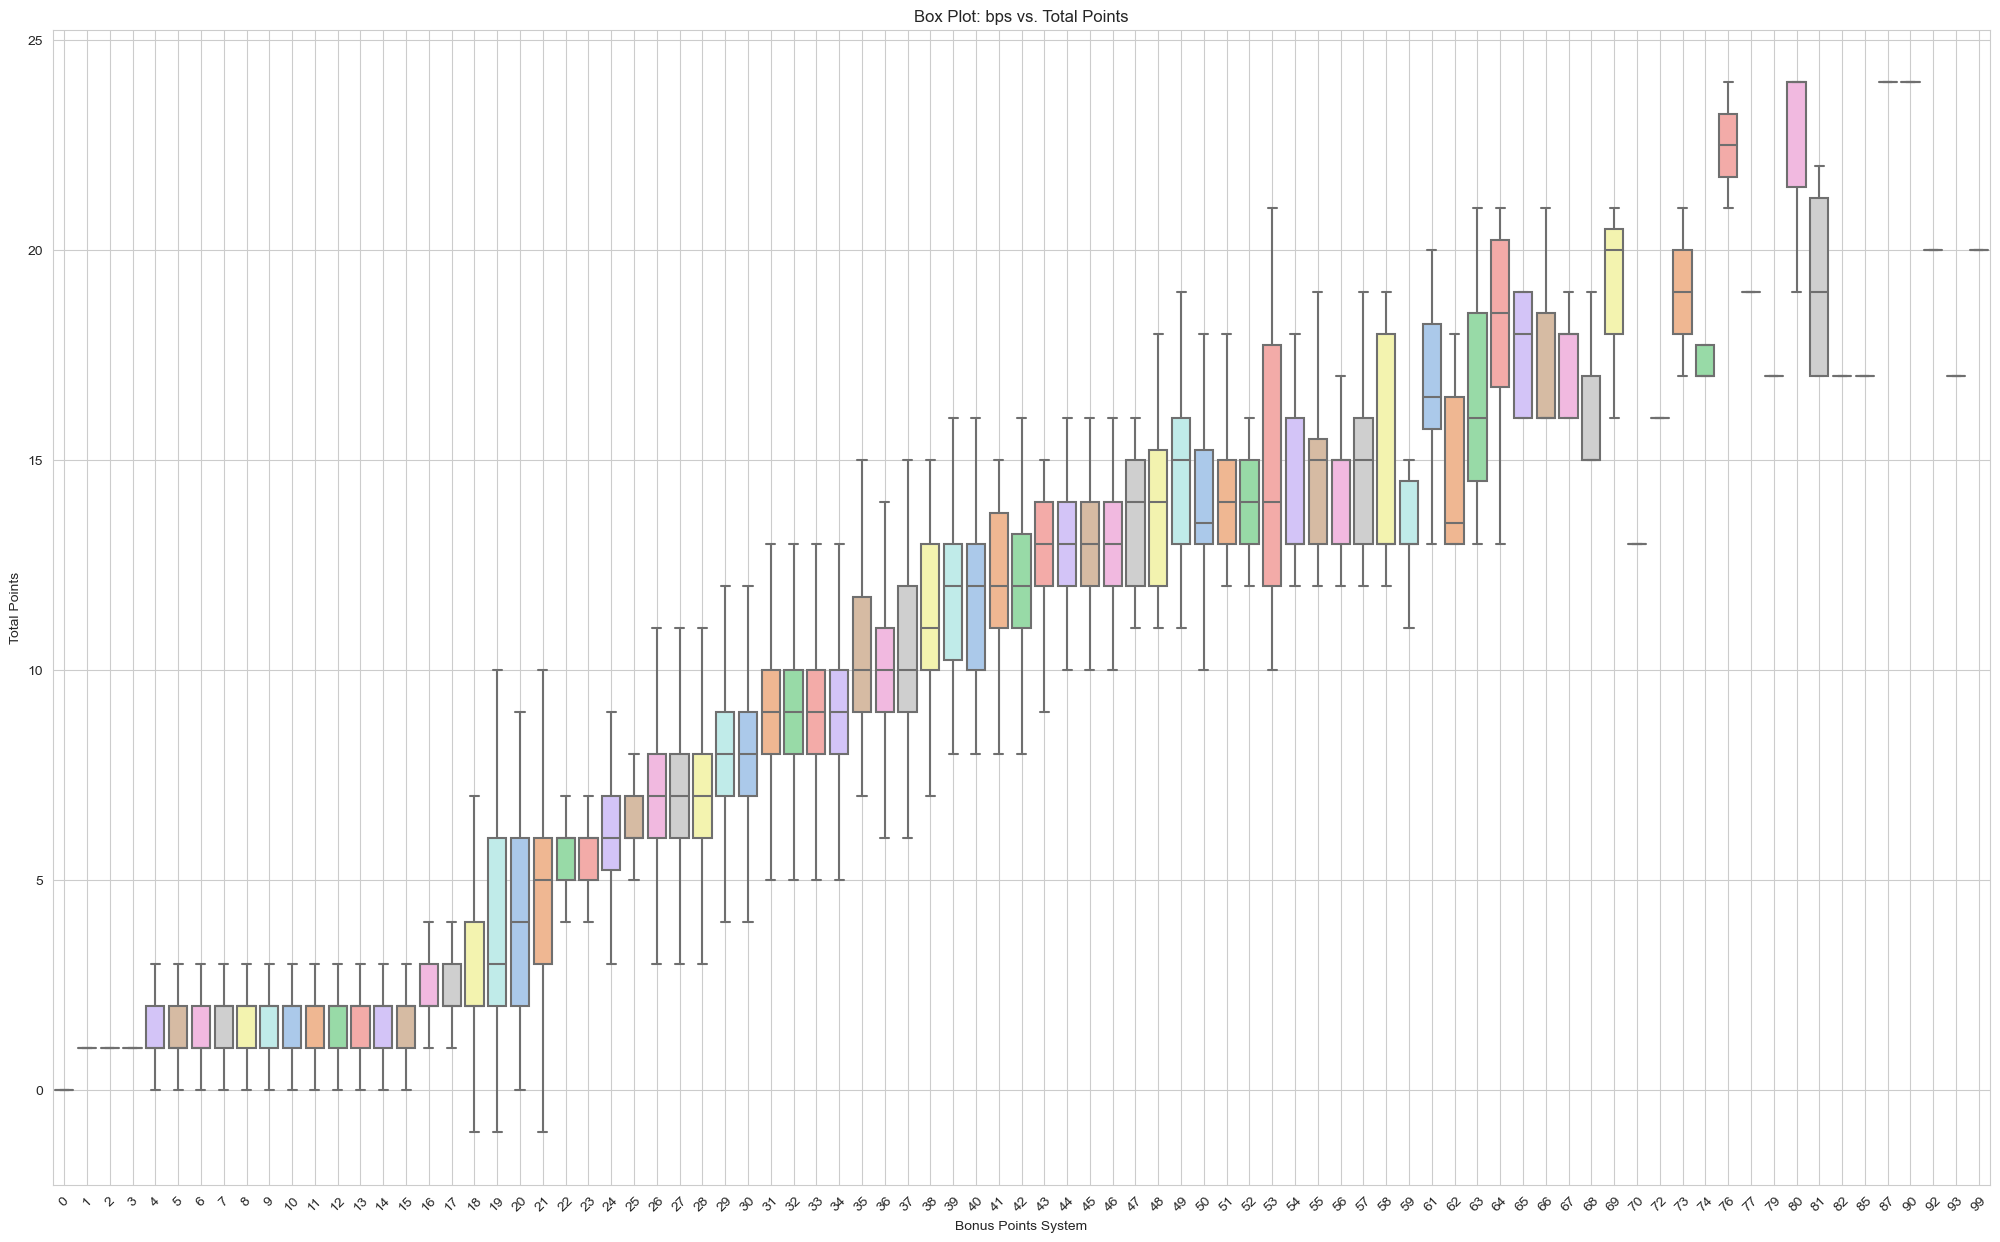

In [29]:
plt.figure(figsize=(25, 15))

df_box = df[(df['bonus_points'] >= 0) & (df['bonus_points'] <= 100)]

# Create the box plot
sns.boxplot(x='bonus_points', y='total_points', data=df_box, showfliers=False, palette='pastel')

plt.xlabel('Bonus Points System')
plt.ylabel('Total Points')
plt.title('Box Plot: bps vs. Total Points')
plt.xticks(rotation=45)

# Add grid
plt.grid(True)

plt.show()

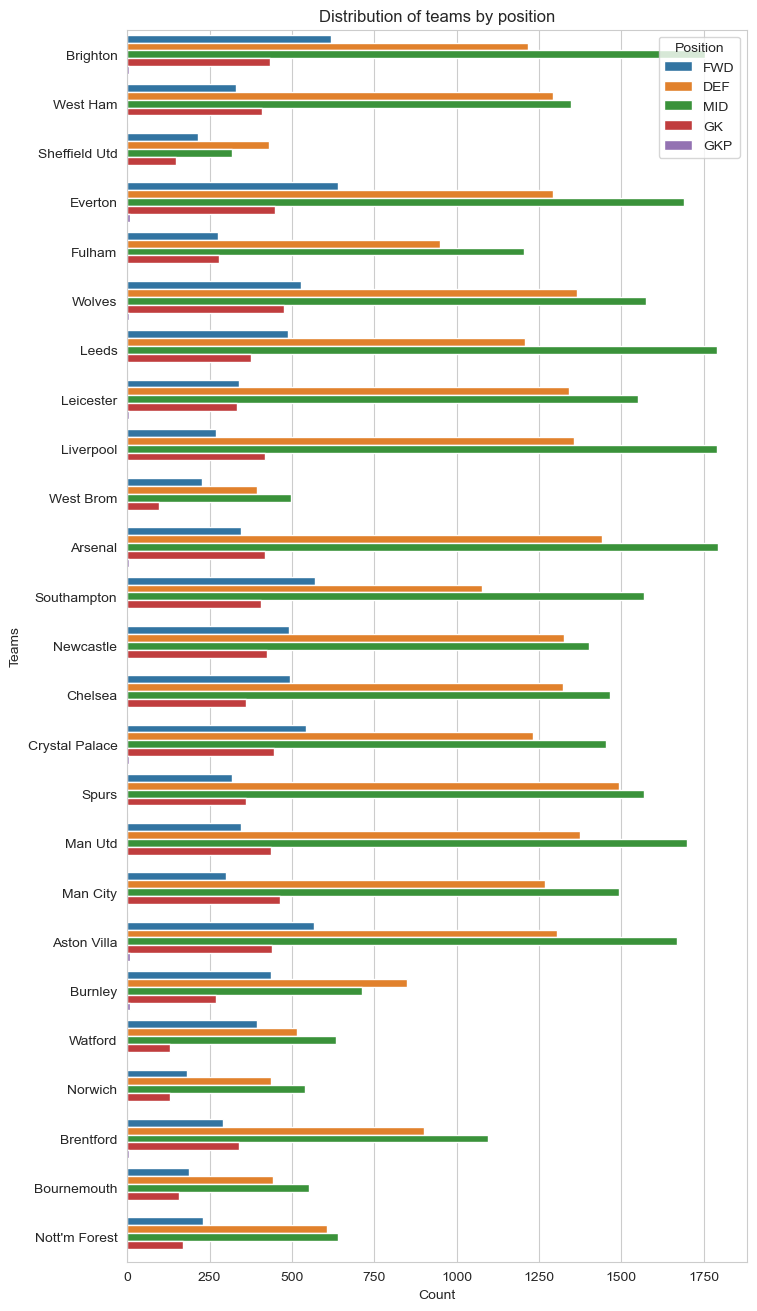

In [30]:

plt.figure(figsize=(8, 16))  # Set the figure size

# Create the count plot
sns.countplot(data=df, y="team_name", hue="position")

# Set title and labels
plt.title("Distribution of teams by position")
plt.xlabel("Count")
plt.ylabel("Teams")

# Add legend
plt.legend(title="Position", loc="upper right")

# Show the plot
plt.show()

### The above data seems to be skewed since it is evaluating all positions of the player with equal parameters.  
### So we will be mapping players based on position as follows:
* __GK  : 0__
* __GKP : 0__
* __DEF : 1__
* __MID : 2__
* __FWD : 3__

In [31]:
# Define the mapping dictionary
position_mapping = {
    'GK': 0,
    'GKP': 0,
    'DEF': 1,
    'MID': 2,
    'FWD': 3
}

# Map the positions to numeric values
df['position_numeric'] = df['position'].map(position_mapping)

# Check the result
print(df[['position', 'position_numeric']].head())

      position  position_numeric
19852      FWD                 3
19853      DEF                 1
19854      MID                 2
19855       GK                 0
19856      MID                 2


In [32]:
df.head()

season_x                name position      team_name  assists  bonus  \
19852  2020-21      Aaron Connolly      FWD       Brighton        0      0   
19853  2020-21     Aaron Cresswell      DEF       West Ham        0      0   
19854  2020-21          Aaron Mooy      MID       Brighton        0      0   
19855  2020-21      Aaron Ramsdale       GK  Sheffield Utd        0      0   
19856  2020-21  Abdoulaye Doucouré      MID        Everton        0      0   

       bonus_points  clean_sheets  creativity  element  ...  threat  \
19852            -3             0         0.3       78  ...    32.0   
19853            11             0        11.2      435  ...     0.0   
19854             0             0         0.0       60  ...     0.0   
19855            12             0         0.0      483  ...     0.0   
19856            20             1        44.6      512  ...     4.0   

       total_points  transfers_balance  transfers_in  transfers_out value  \
19852             1                  0             0              0    55   
19853             1                  0             0              0    50   
19854             0                  0             0              0    50   
19855             1                  0             0              0    50   
19856             3                  0             0              0    55   

       was_home  yellow_cards GW  position_numeric  
19852      True             0  1                 3  
19853      True             0  1                 1  
19854      True             0  1                 2  
19855      True             0  1                 0  
19856     False             0  1                 2  

[5 rows x 38 columns]

In [33]:
# Drop the 'position' column
df.drop(columns=['position'], inplace=True)

# Check if 'position_numeric' column still exists
print('position_numeric' in df.columns)  


True


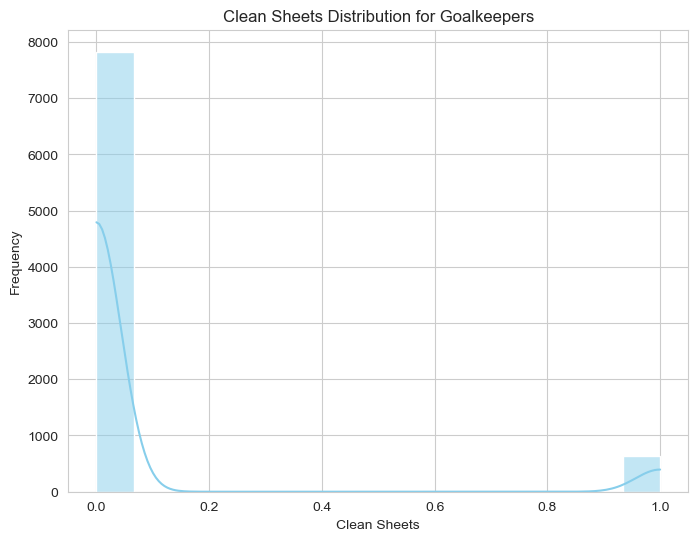

In [34]:
# Filter the DataFrame for rows where position_numeric is 0 (goalkeepers)
goalkeeper_data = df[df['position_numeric'] == 0]

# Create a histogram of clean sheets for goalkeepers
plt.figure(figsize=(8, 6))
sns.histplot(goalkeeper_data['clean_sheets'], kde=True, color='skyblue')
plt.title('Clean Sheets Distribution for Goalkeepers')
plt.xlabel('Clean Sheets')
plt.ylabel('Frequency')
plt.show()

### Q5. Which independent variables have missing data? How much? 

In [35]:
df.isnull().sum()

season_x             0
name                 0
team_name            0
assists              0
bonus                0
bonus_points         0
clean_sheets         0
creativity           0
element              0
fixture              0
goals_conceded       0
goals_scored         0
ict_index            0
influence            0
kickoff_time         0
minutes              0
opponent_team        0
opp_team_name        0
own_goals            0
penalties_missed     0
penalties_saved      0
red_cards            0
round                0
saves                0
selected             0
team_a_score         0
team_h_score         0
threat               0
total_points         0
transfers_balance    0
transfers_in         0
transfers_out        0
value                0
was_home             0
yellow_cards         0
GW                   0
position_numeric     0
dtype: int64

#### As we have deleted the rows which had null values in the column 'team_x', there is no missing data.

### Q6. Do the training and test sets have the same data?

__Yes, the same data set is been used for training, validation and testing the data.__

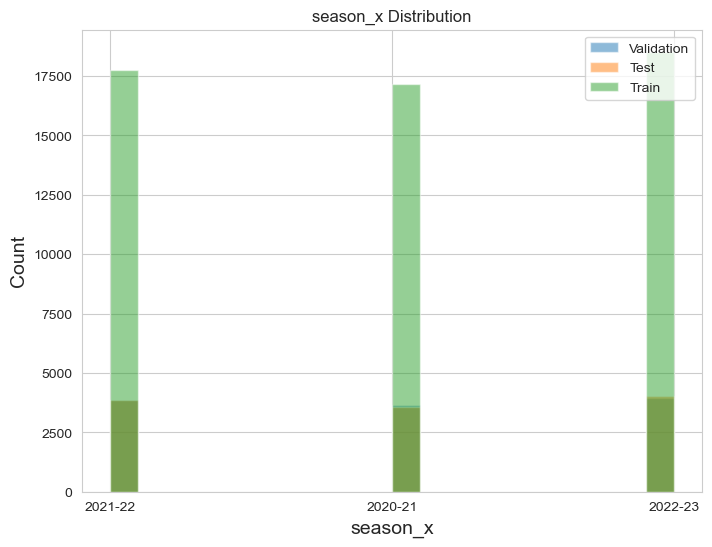

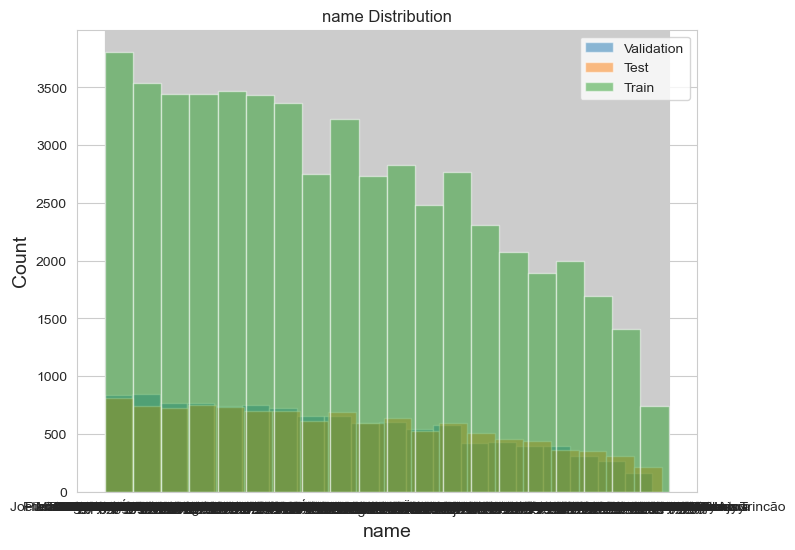

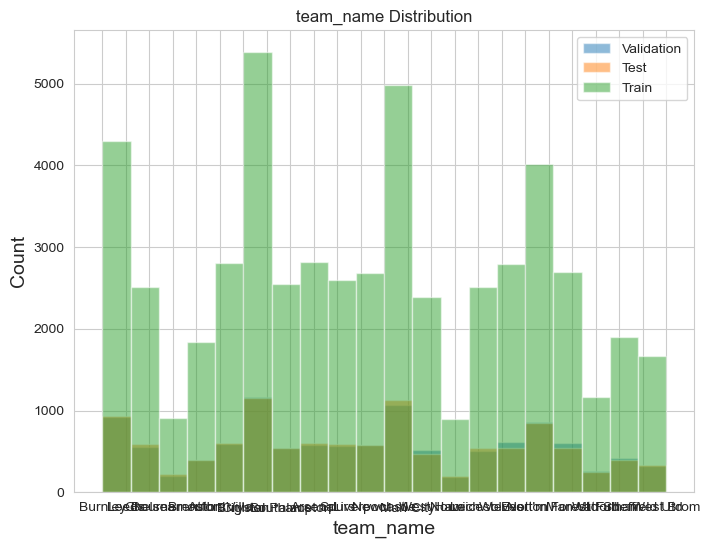

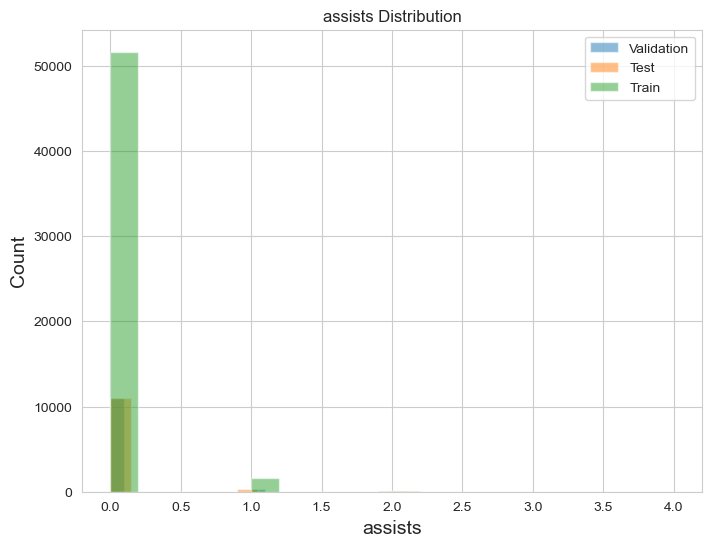

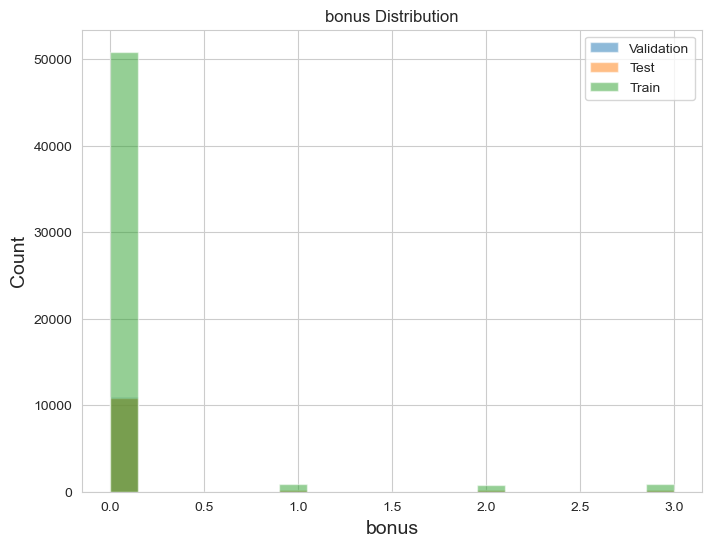

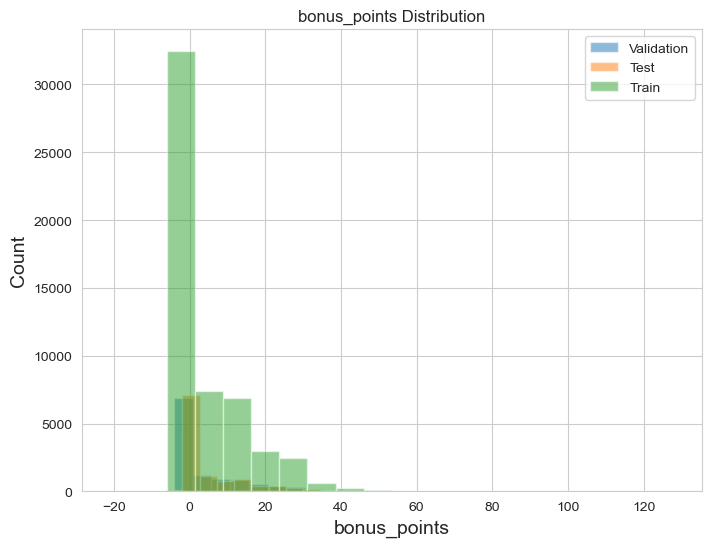

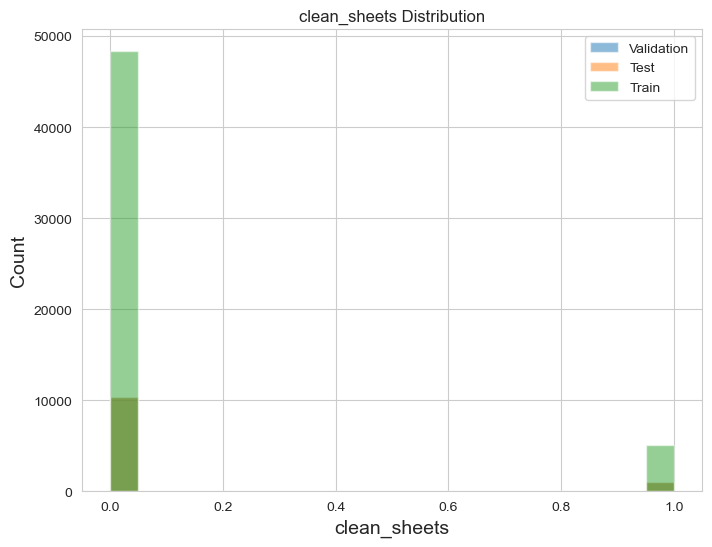

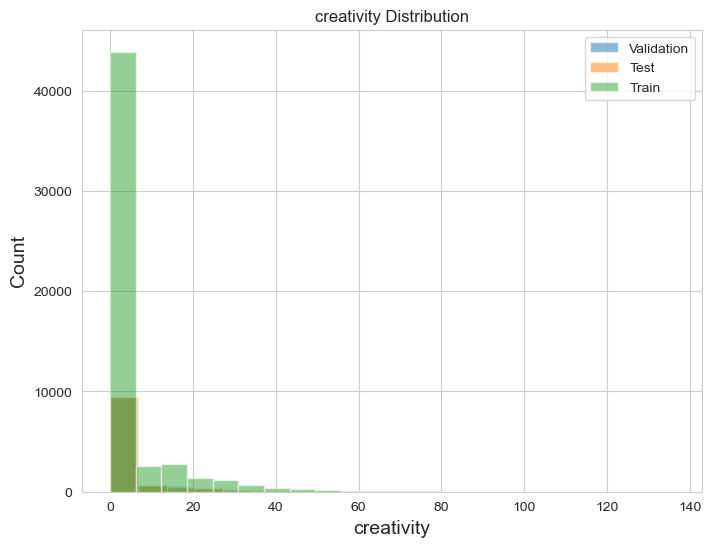

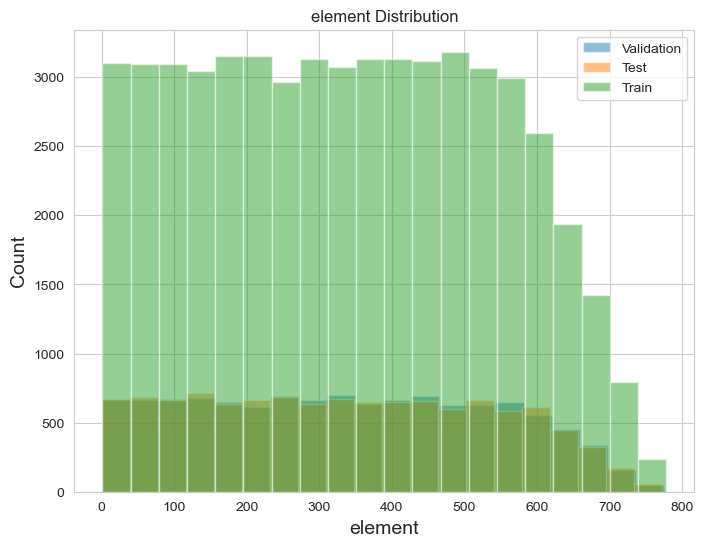

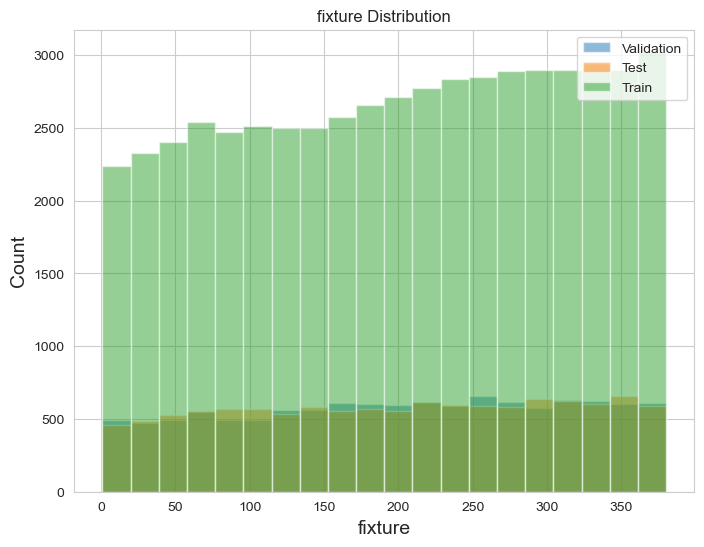

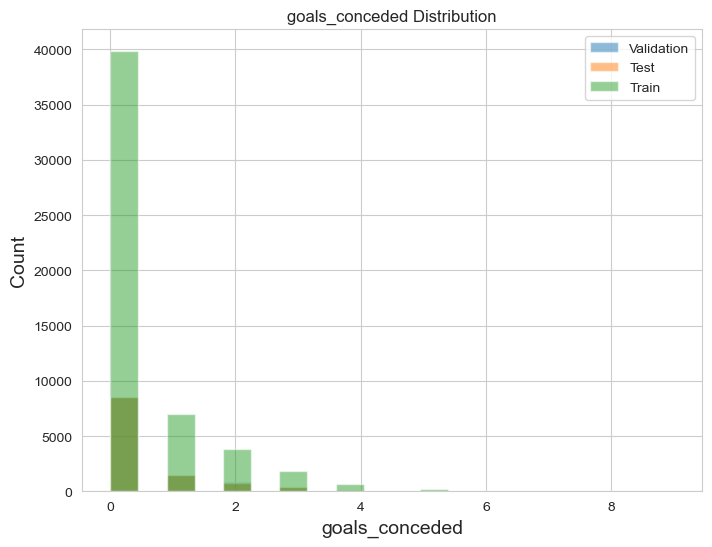

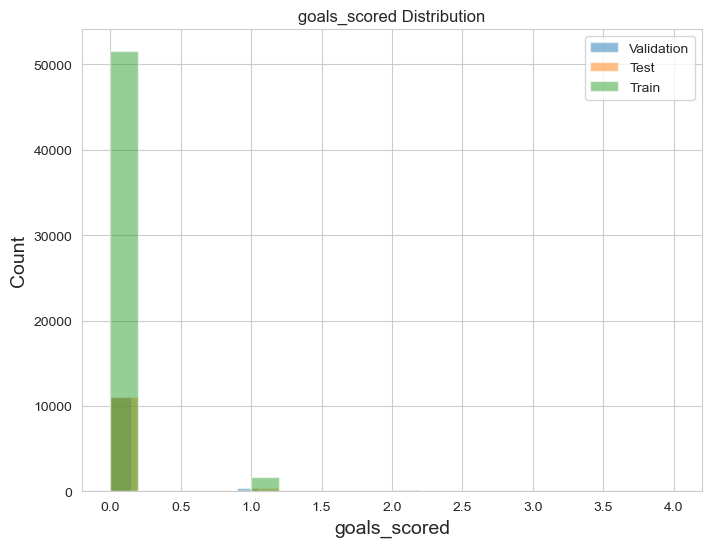

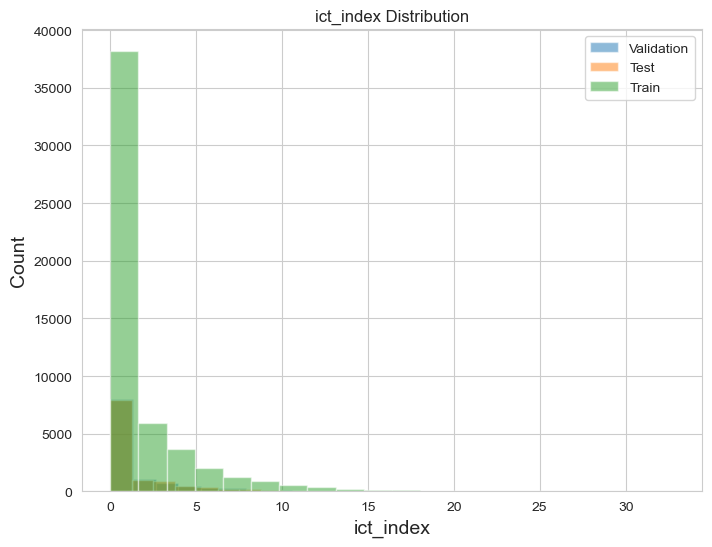

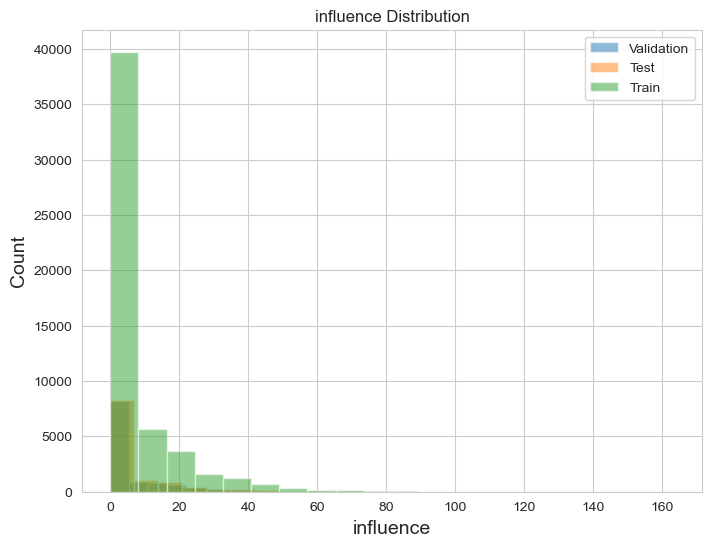

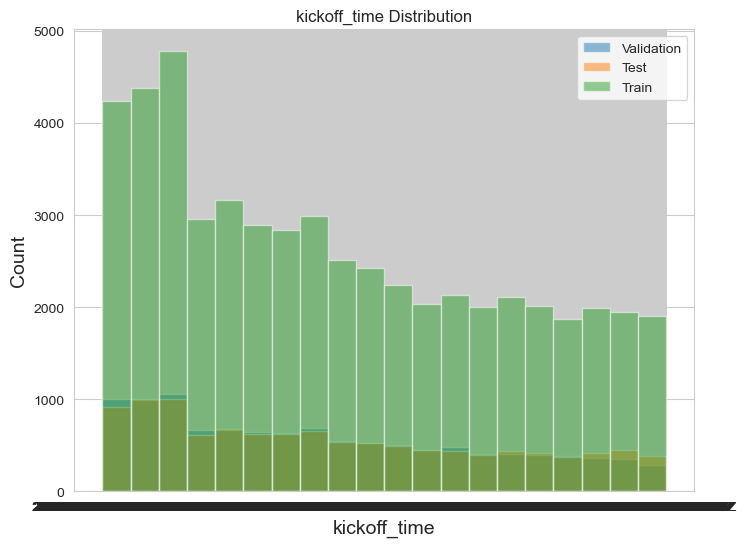

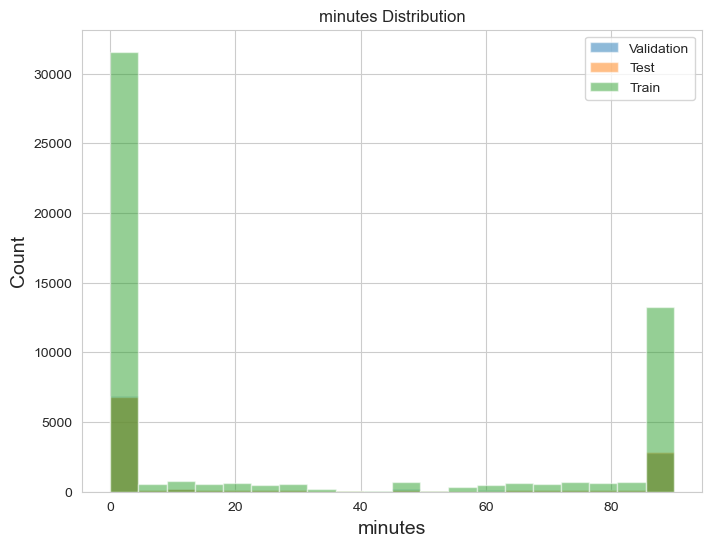

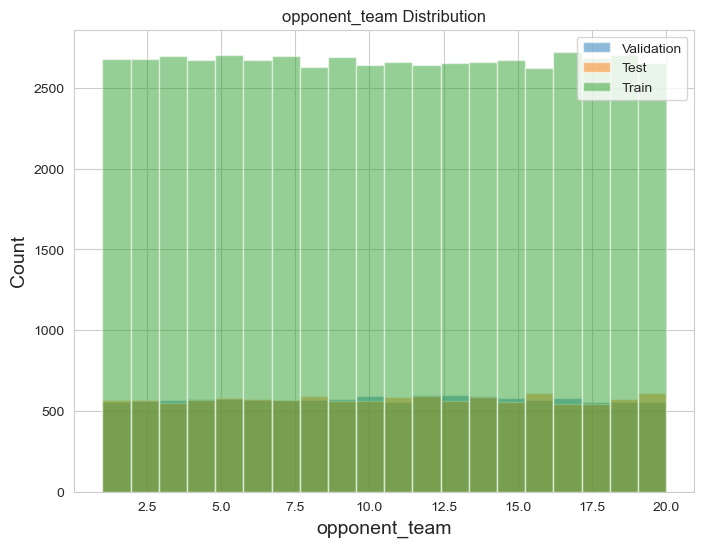

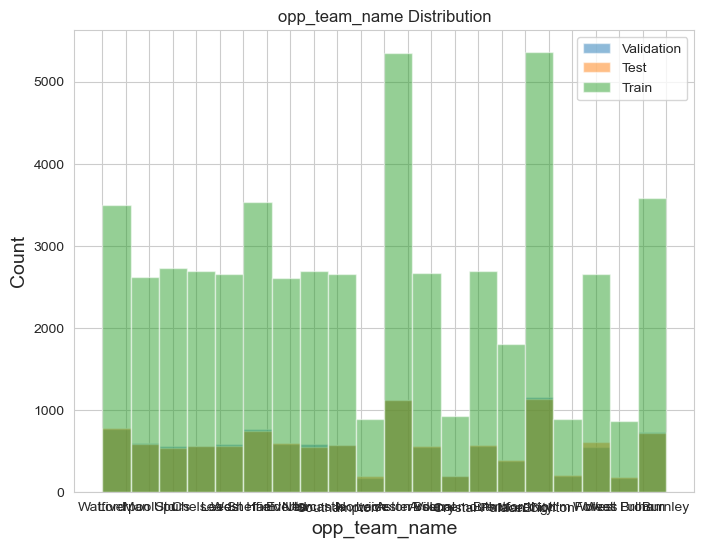

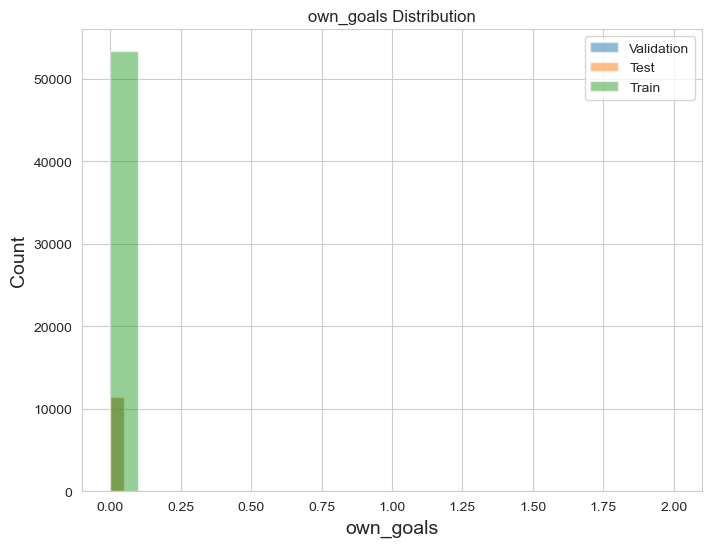

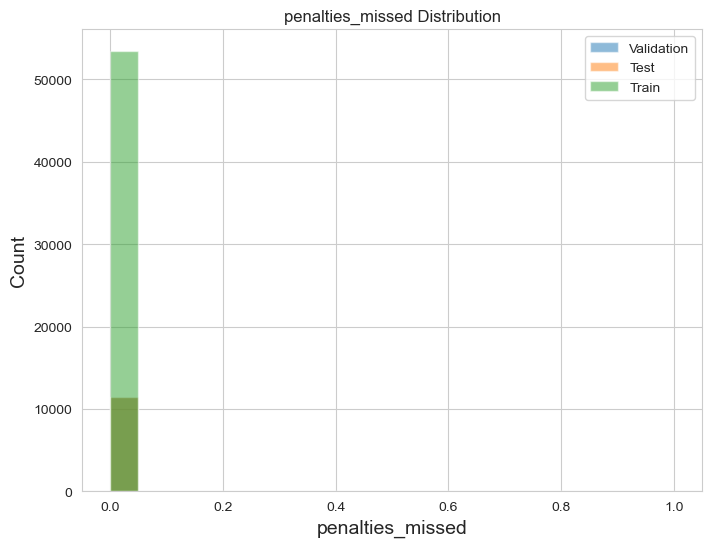

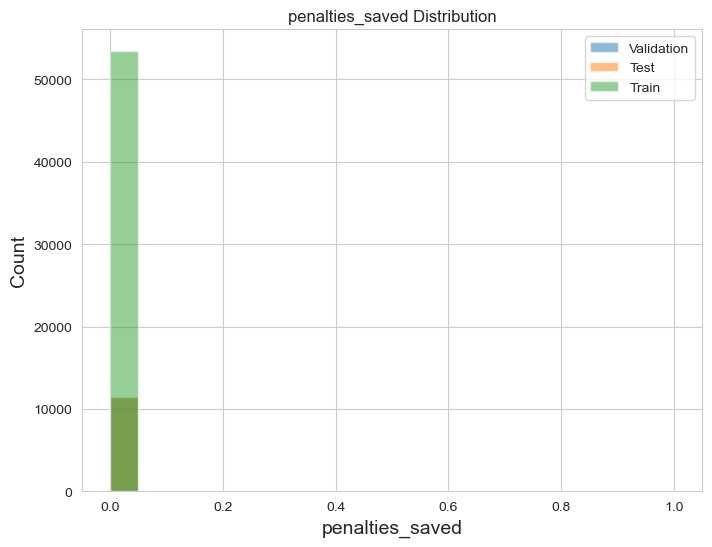

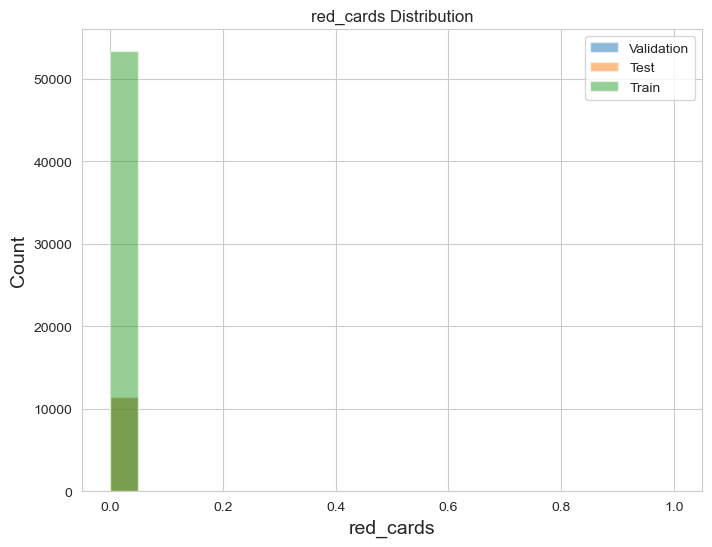

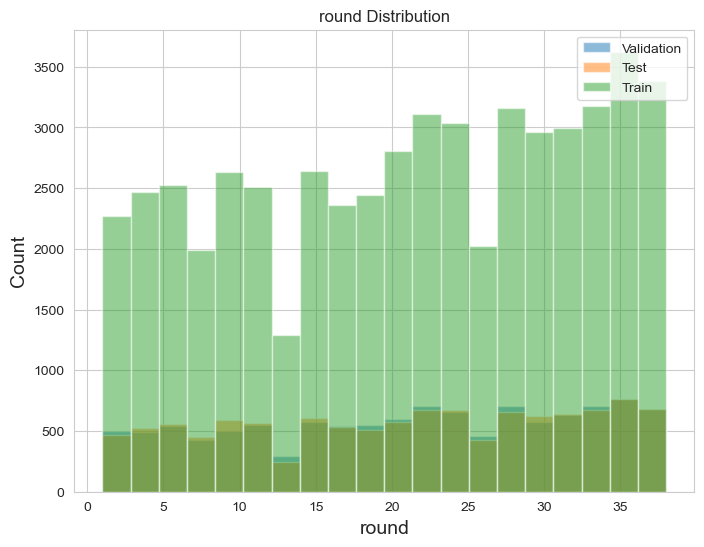

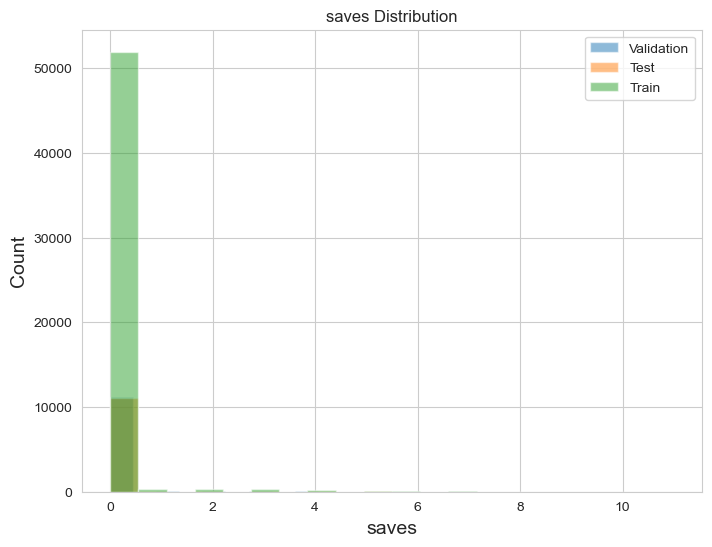

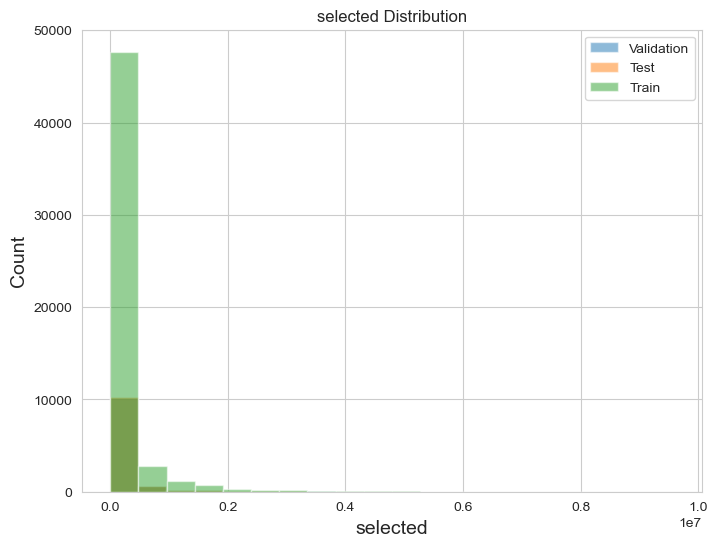

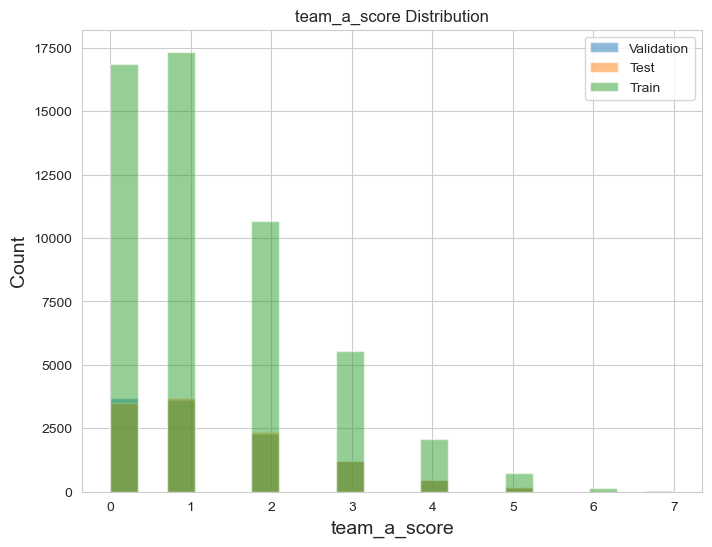

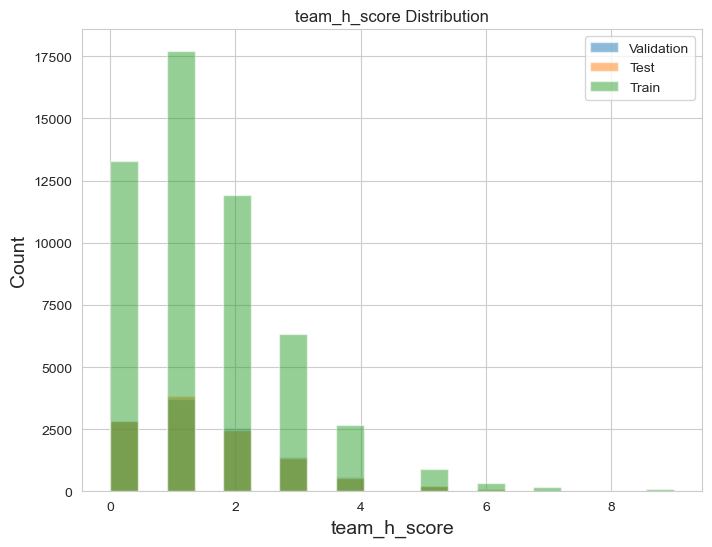

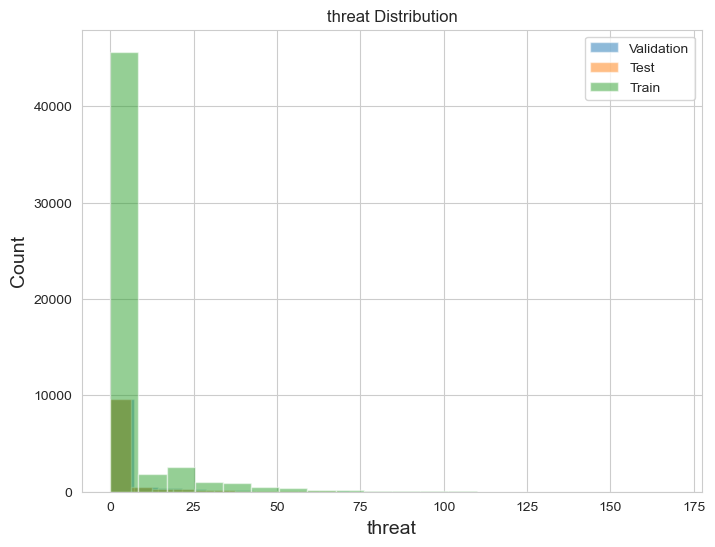

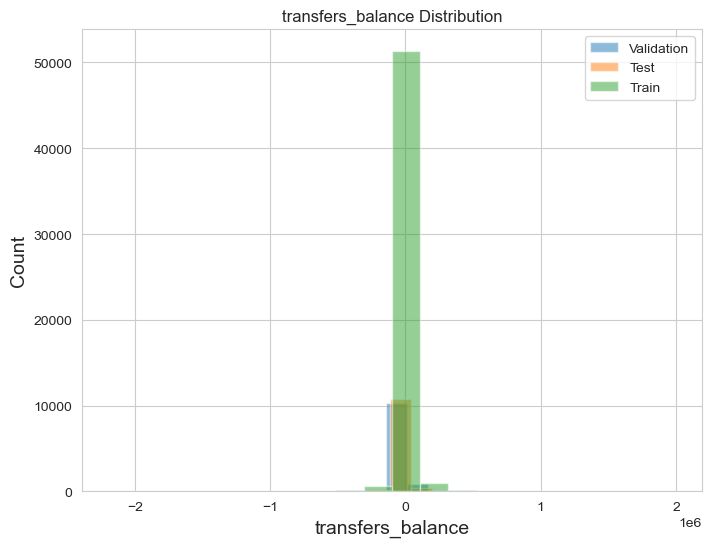

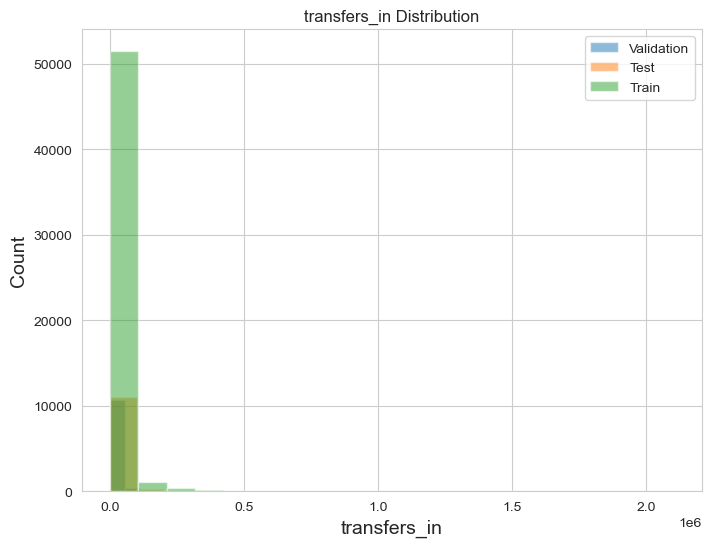

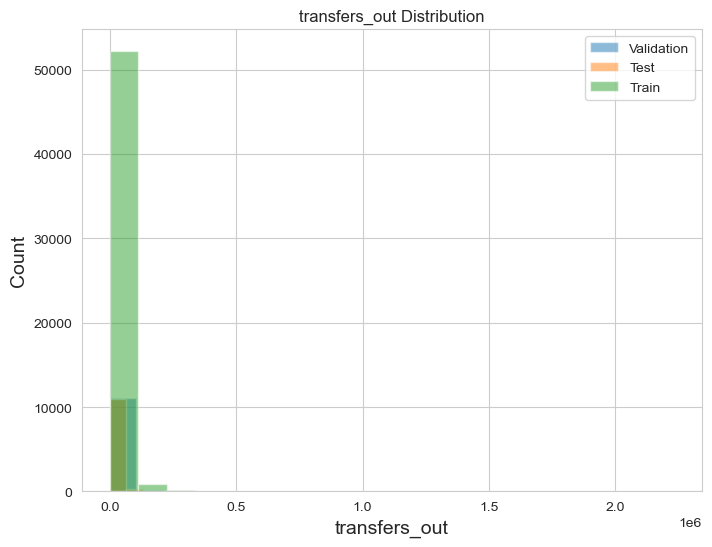

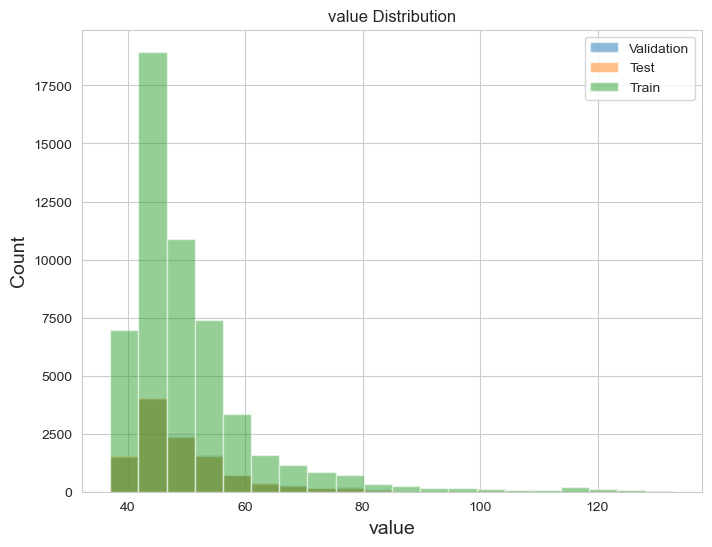

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

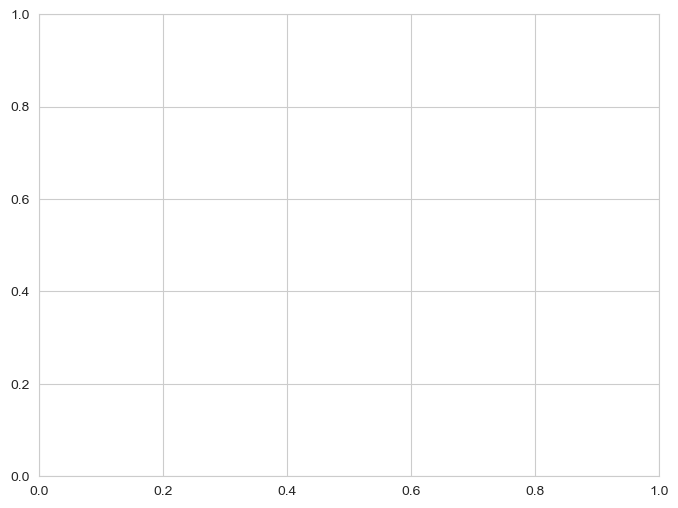

In [36]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = df.drop(columns=['total_points'])  # Assuming 'total_points' is your target variable
y = df['total_points']

# Split the data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Plotting the data distributions for training, validation, and test sets
for c in X_train.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val[c], bins=20, alpha=0.5, label="Validation")
    plt.hist(X_test[c], bins=20, alpha=0.5, label="Test")
    plt.hist(X_train[c], bins=20, alpha=0.5, label="Train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title(f"{c} Distribution")
    plt.show()

### Q7. Is the predictor variables independent of all the other predictor variables?

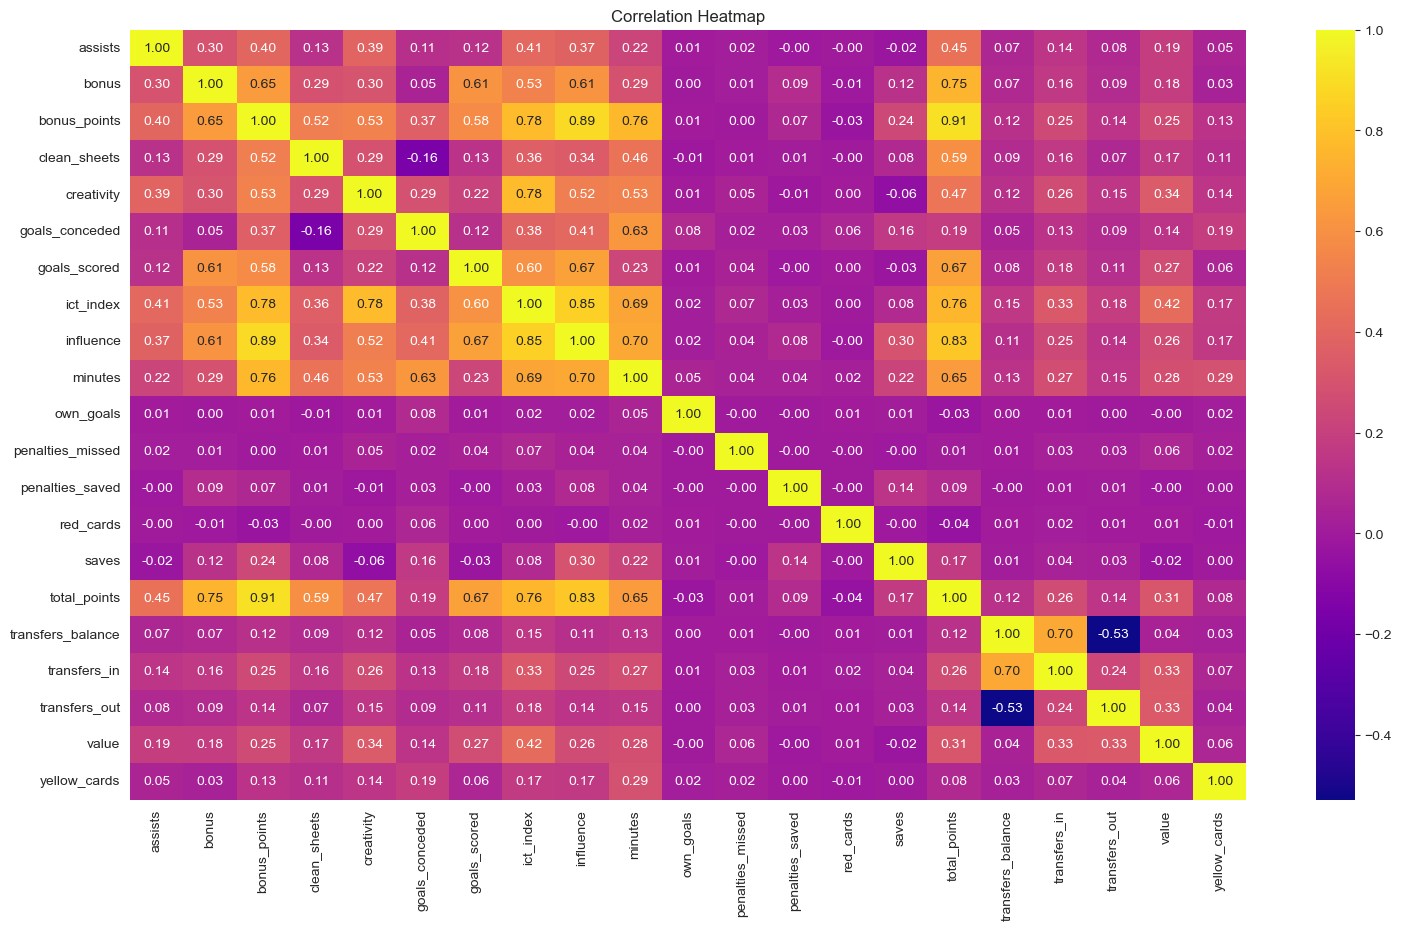

In [37]:
cols = ['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value', 'yellow_cards']
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Based on the correlation matrix, we cannot conclude whether predictor variables are independent of all the other predictor variables. 
To determine independence, we would need to conduct __Multicollinearity Analysis__

#### For which we perform:
* __Calculate Correlation Matrix__ : This matrix will show how each variable correlates with every other variable.
* __Variance Inflation Factor (VIF) Analysis__ : VIF quantifies the severity of multicollinearity in a regression model. 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'df' is your DataFrame containing predictor variables
# Drop any non-numeric columns if present
numeric_df = df.select_dtypes(include=[np.number])

# Add a constant term for the intercept
X = add_constant(numeric_df)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns

# Calculate VIF, handling division by zero
vif["VIF"] = [variance_inflation_factor(X.values, i) if i != 0 else np.nan for i in range(X.shape[1])]

print(vif)

C:\Users\visma\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Variable           VIF
0               const           NaN
1             assists  2.359705e+00
2               bonus  3.184787e+00
3        bonus_points  1.407087e+01
4        clean_sheets  3.234988e+00
5          creativity  9.678979e+02
6             element  1.065536e+00
7             fixture  1.465352e+01
8      goals_conceded  3.415650e+00
9        goals_scored  6.332298e+00
10          ict_index  7.814132e+03
11          influence  1.429261e+03
12            minutes  9.303801e+00
13      opponent_team  1.008754e+00
14          own_goals  1.035138e+00
15   penalties_missed  1.022316e+00
16    penalties_saved  1.070017e+00
17          red_cards  1.052394e+00
18              round           inf
19              saves  1.580467e+00
20           selected  2.047582e+00
21       team_a_score  1.134163e+00
22       team_h_score  1.163069e+00
23             threat  1.483569e+03
24       total_points  2.145076e+01
25  transfers_balance  8.376931e+05
26       transfers_in  6.396

### Based on the VIF (Variance Inflation Factor) result:

1. **High VIF (> 10)**: Variables like `ict_index`, `influence`, `creativity`, `fixture`, `total_points`, `transfers_balance`, `transfers_in`, `transfers_out`, and `GW` exhibit strong multicollinearity with other predictors. Further investigation is needed to assess their impact on the model.

2. **Moderate VIF (5 - 10)**: `goals_scored` shows moderate multicollinearity, suggesting some impact on the model but less severe than high VIF variables.

3. **Low VIF (< 5)**: Variables such as `assists`, `bonus`, `clean_sheets`, `element`, `goals_conceded`, `minutes`, `opponent_team`, `own_goals`, `penalties_missed`, `penalties_saved`, `red_cards`, `saves`, `selected`, `team_a_score`, `team_h_score`, `threat`, `value`, and `yellow_cards` exhibit acceptable levels of multicollinearity.

4. **VIF of Infinity**: `round` and `GW` show perfect multicollinearity, necessitating investigation into data or model specification issues.

### Q8. Which predictor variables are the most important?

#### Reason to pick OLS method

- Use a **heat map** for exploring correlations between numerical variables.
- Use a **chi-square test** for analyzing associations between categorical variables.
- Use **OLS regression** for modeling relationships between predictor variables and a numerical response variable.


In [39]:
# Extract predictor variables
X = df[cols]

# Extract response variable (assuming 'total_points' is the response variable)
y = df['total_points']

# Add a constant to the predictor variables to estimate the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.837e+26
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:38:34   Log-Likelihood:             1.8189e+06
No. Observations:               76317   AIC:                        -3.638e+06
Df Residuals:                   76295   BIC:                        -3.638e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.025e-15   1.94e-1

C:\Users\visma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


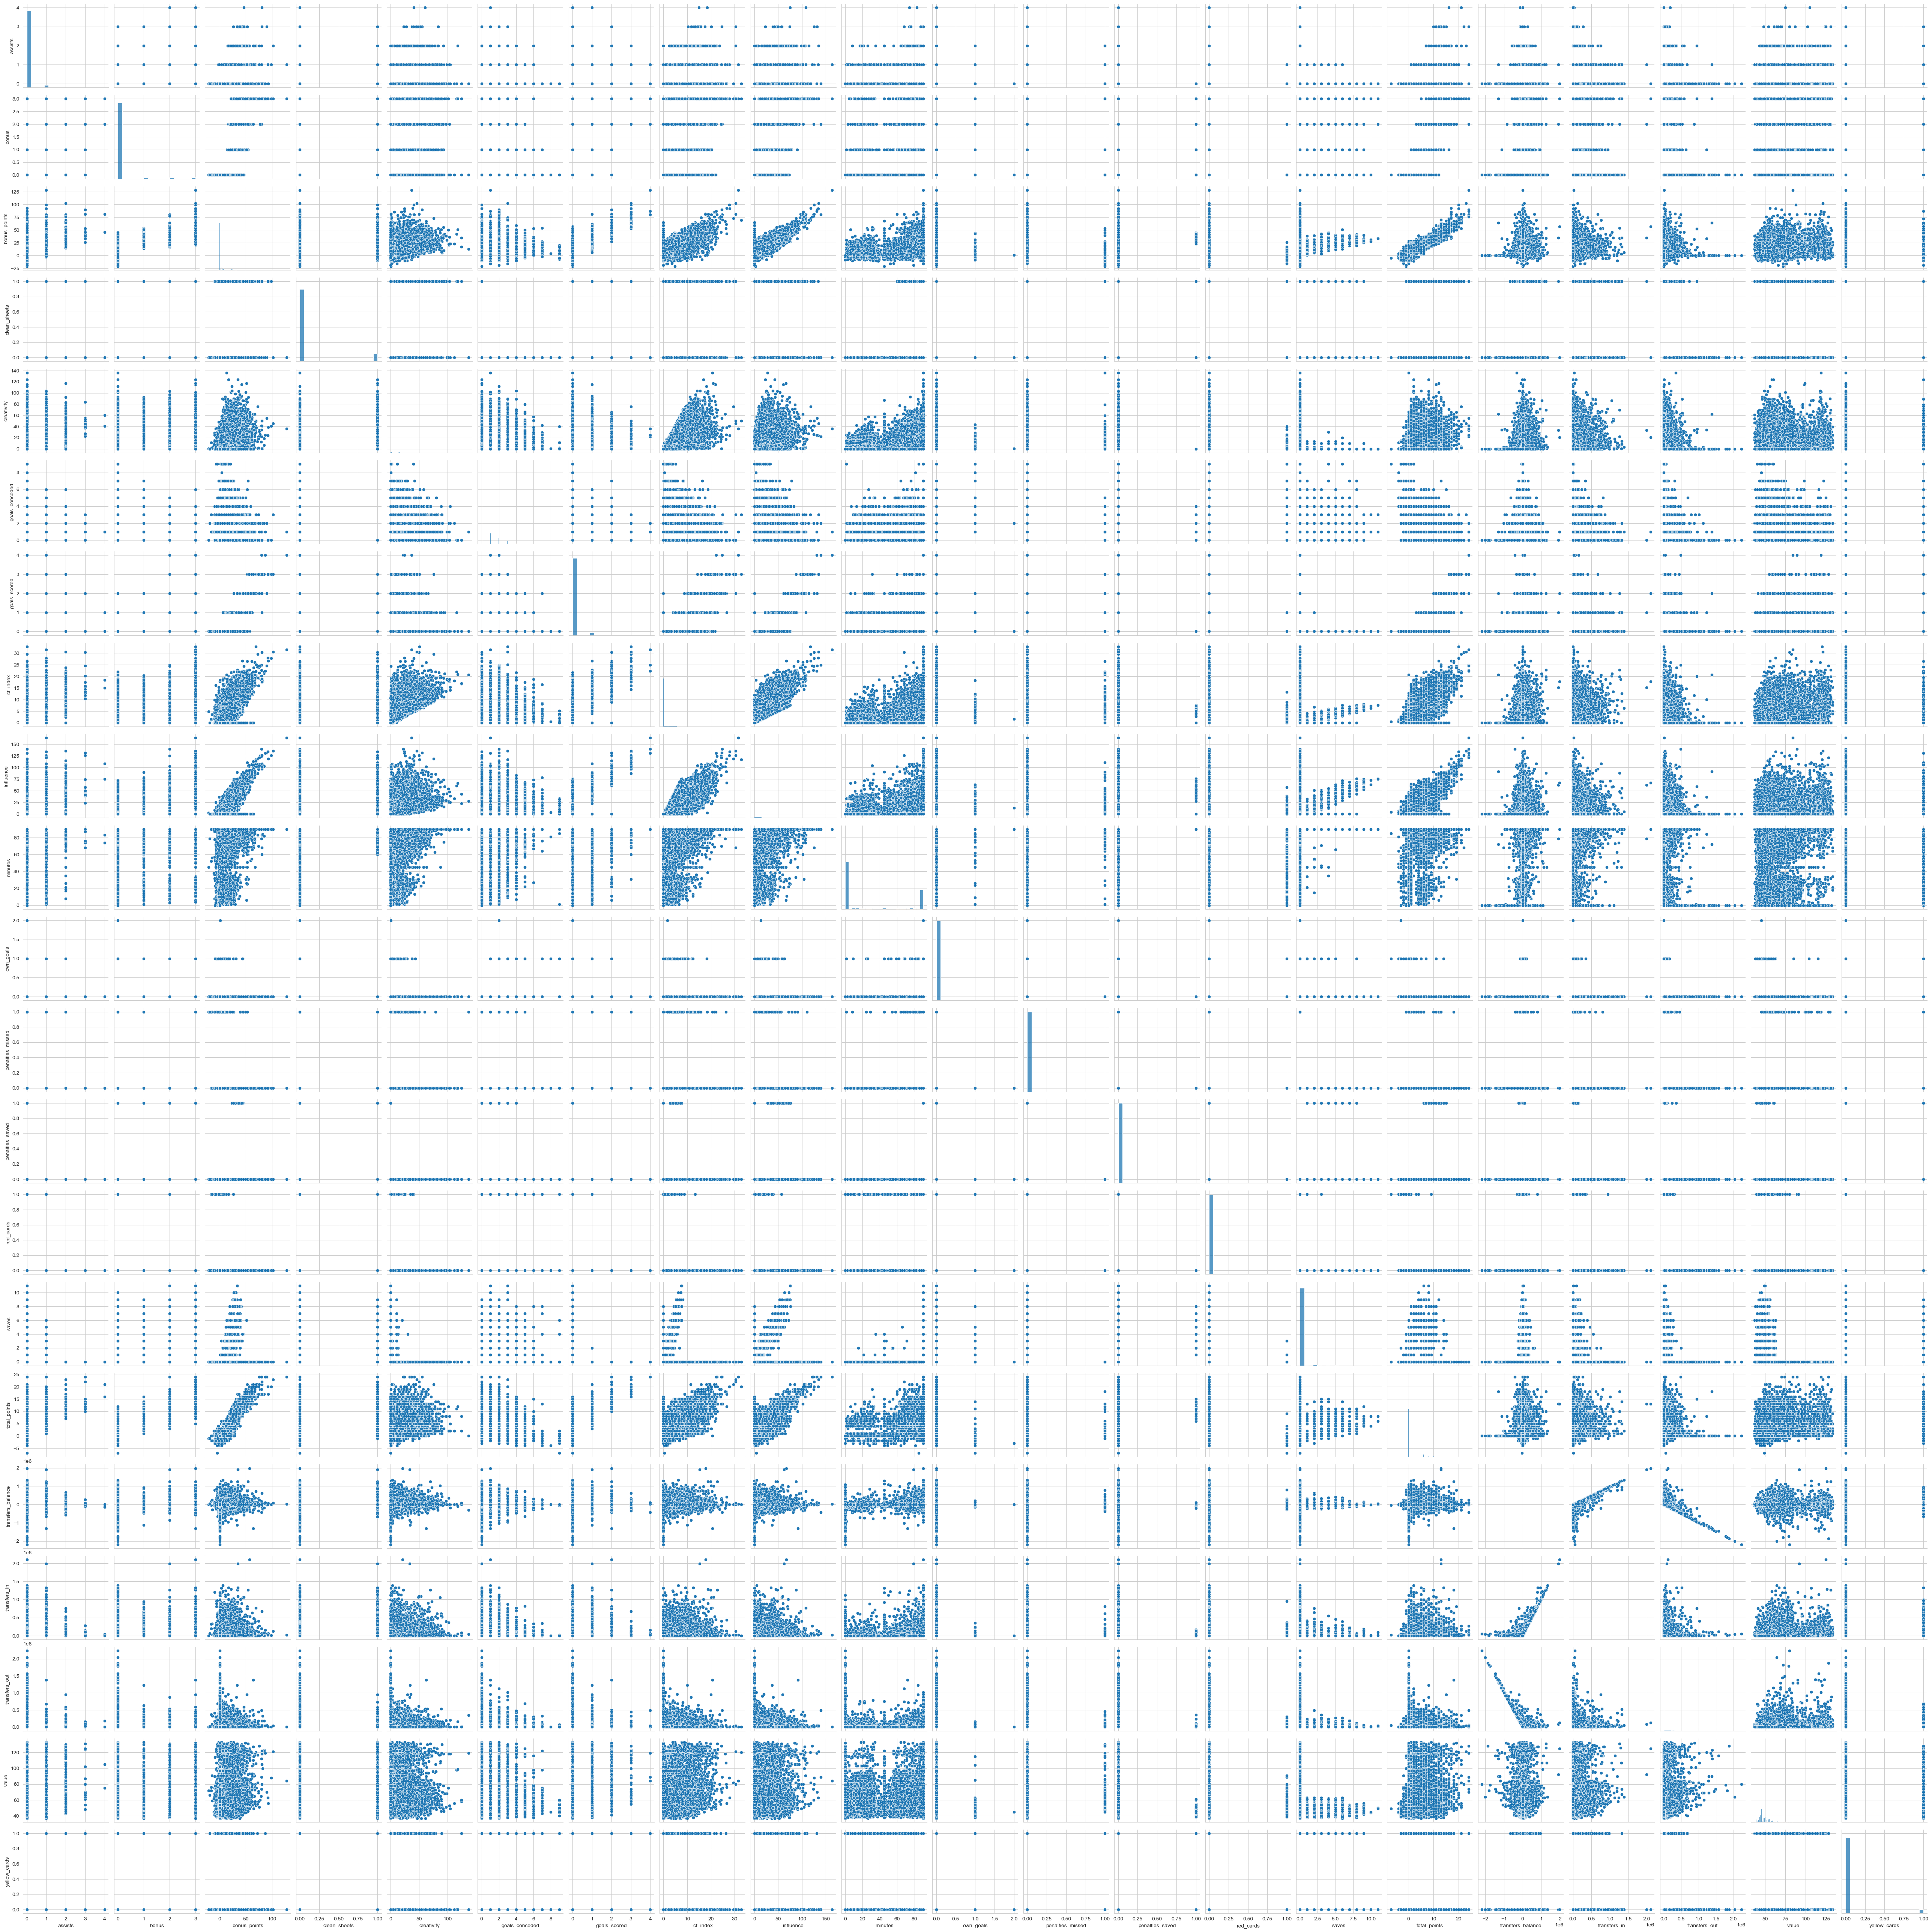

In [22]:
cols = ['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
        'goals_conceded', 'goals_scored', 'ict_index', 'influence',
        'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
        'red_cards', 'saves', 'total_points', 'transfers_balance',
        'transfers_in', 'transfers_out', 'value', 'yellow_cards']
df_subset = df[cols]  # Selecting the columns of interest

# Create pair plot
sns.pairplot(df_subset)
plt.show()

### Q9. Do the ranges of the predictor variables make sense?

C:\Users\visma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


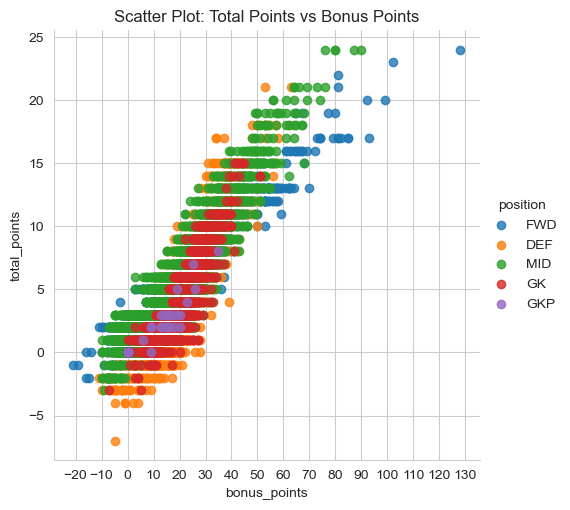

In [20]:
from matplotlib.ticker import MultipleLocator

sns.set_style('whitegrid')

# Create the scatter plot with lmplot
sns.lmplot(x='bonus_points', y='total_points', data=df, fit_reg=False, hue='position')

plt.gca().xaxis.set_major_locator(MultipleLocator(10)) 

# Set the title
plt.title("Scatter Plot: Total Points vs Bonus Points")

# Show the plot
plt.show()

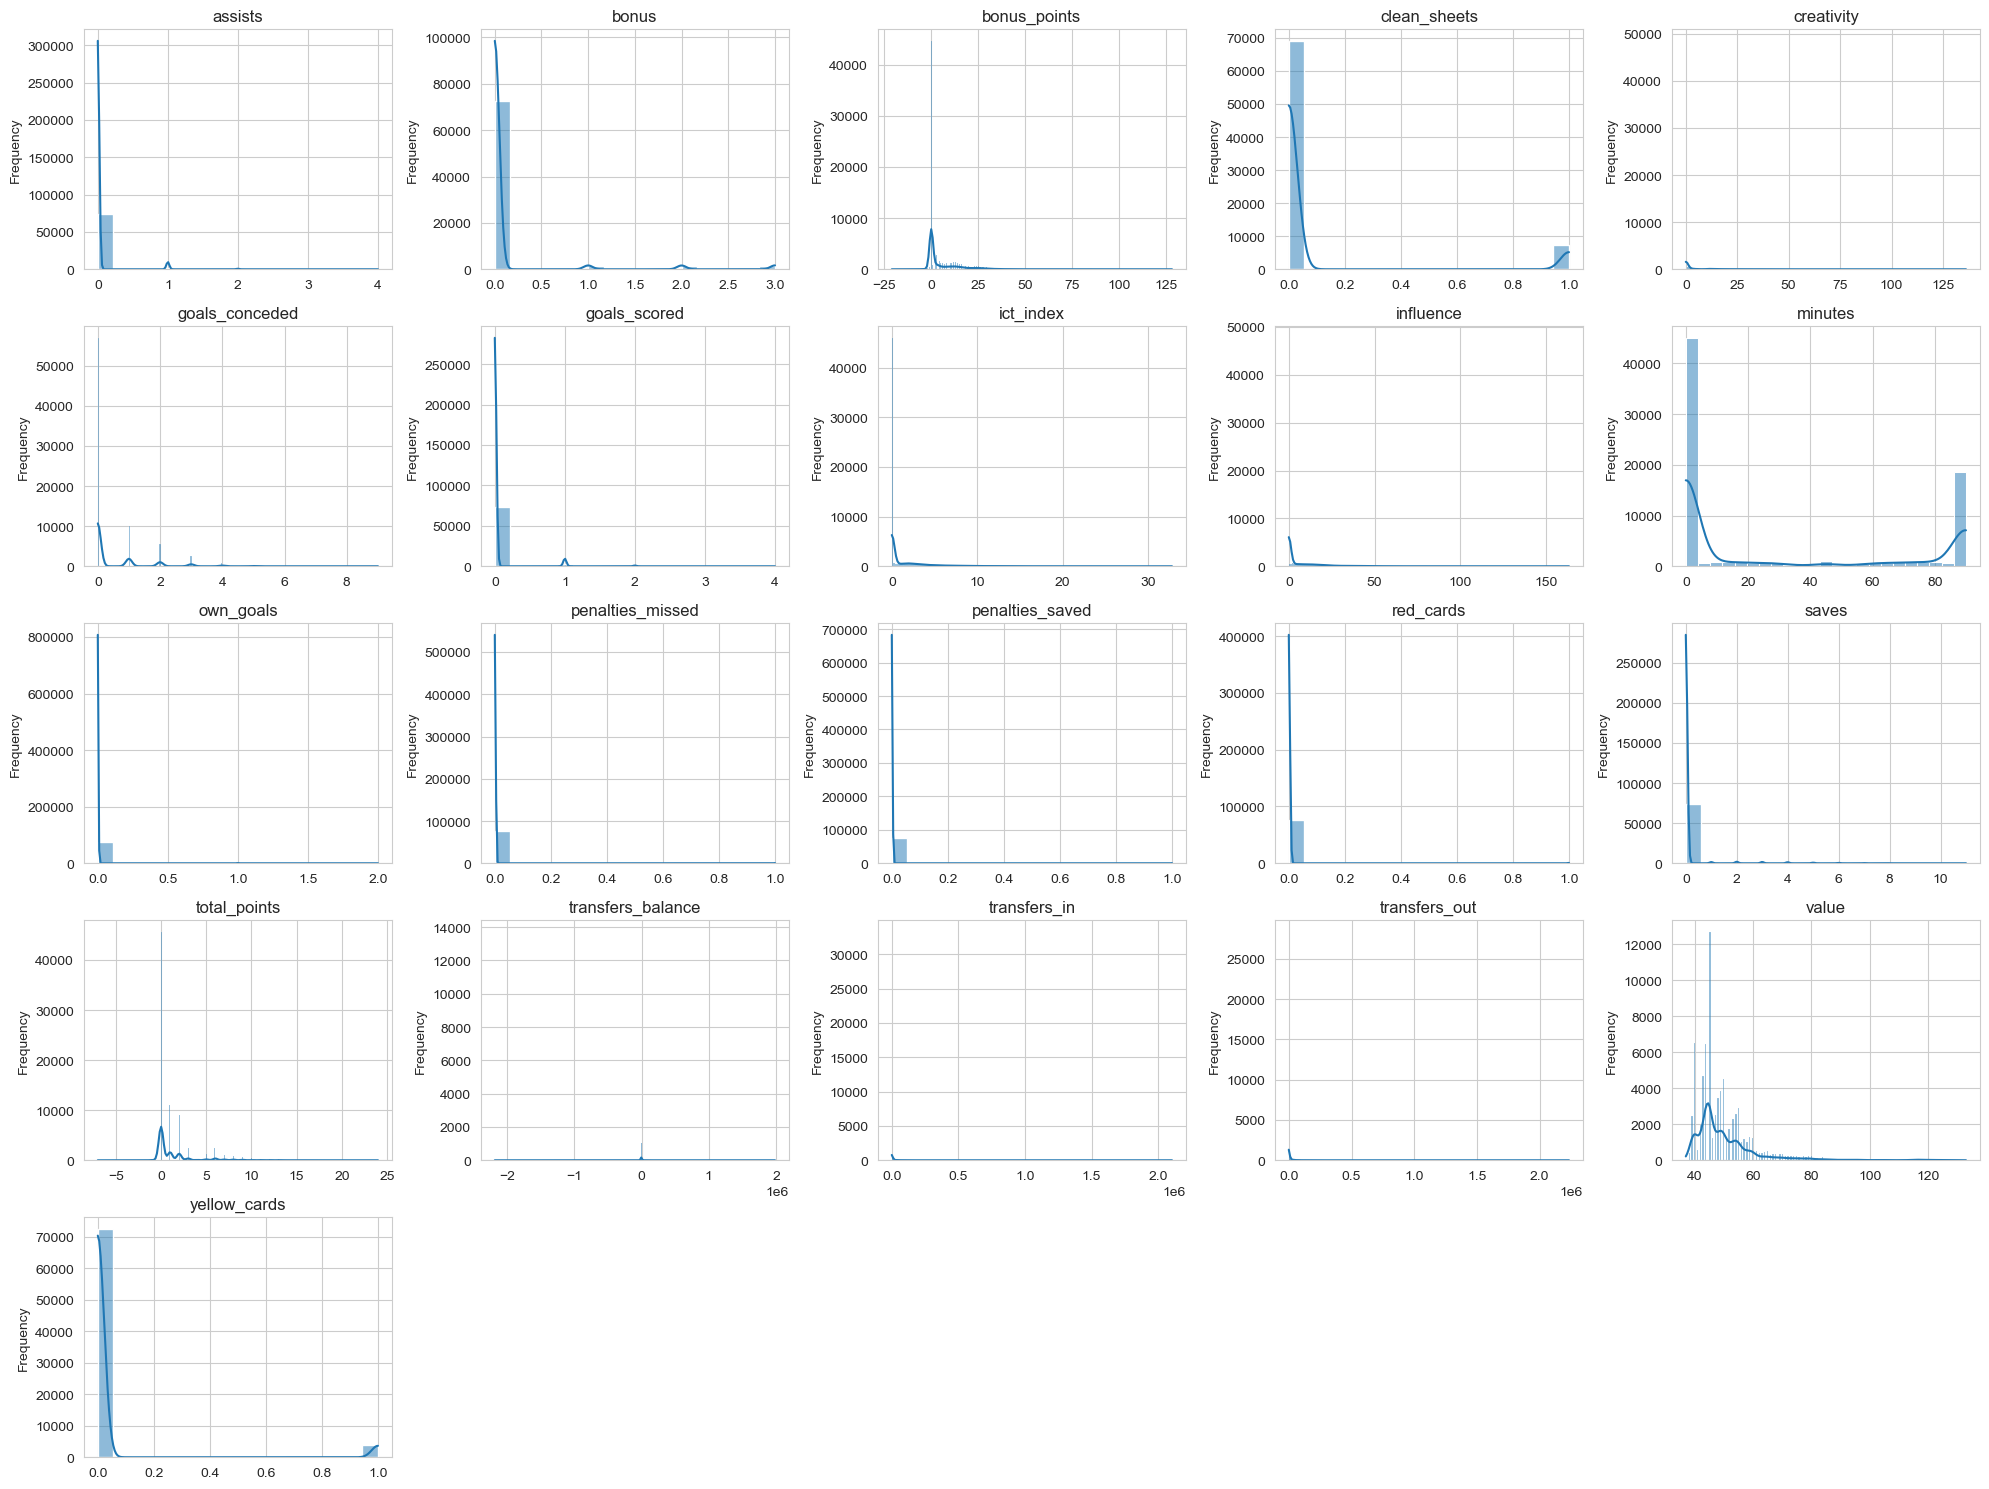

In [23]:
# Assuming df contains your dataset and cols contains the predictor variable names
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

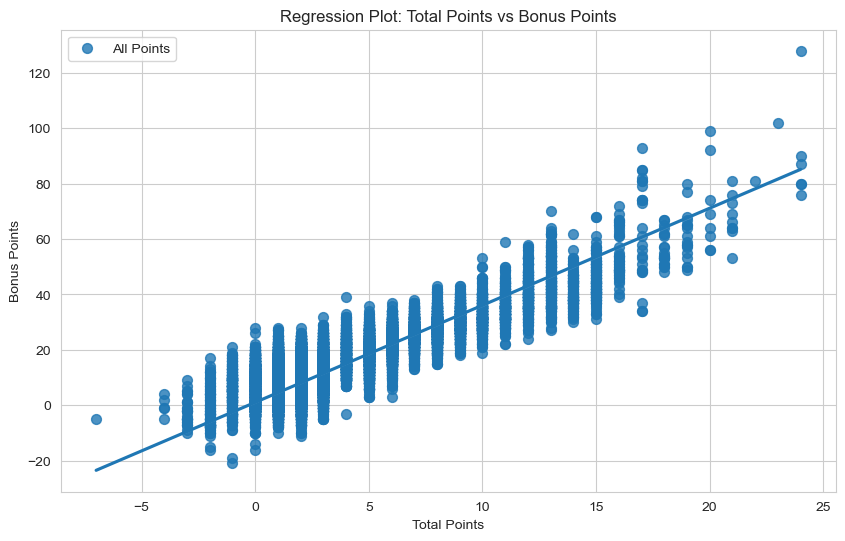

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='total_points', y='bonus_points', data=df, scatter_kws={'s': 50}, label='All Points')
plt.title('Regression Plot: Total Points vs Bonus Points')
plt.xlabel('Total Points')
plt.ylabel('Bonus Points')
plt.legend()
plt.show()

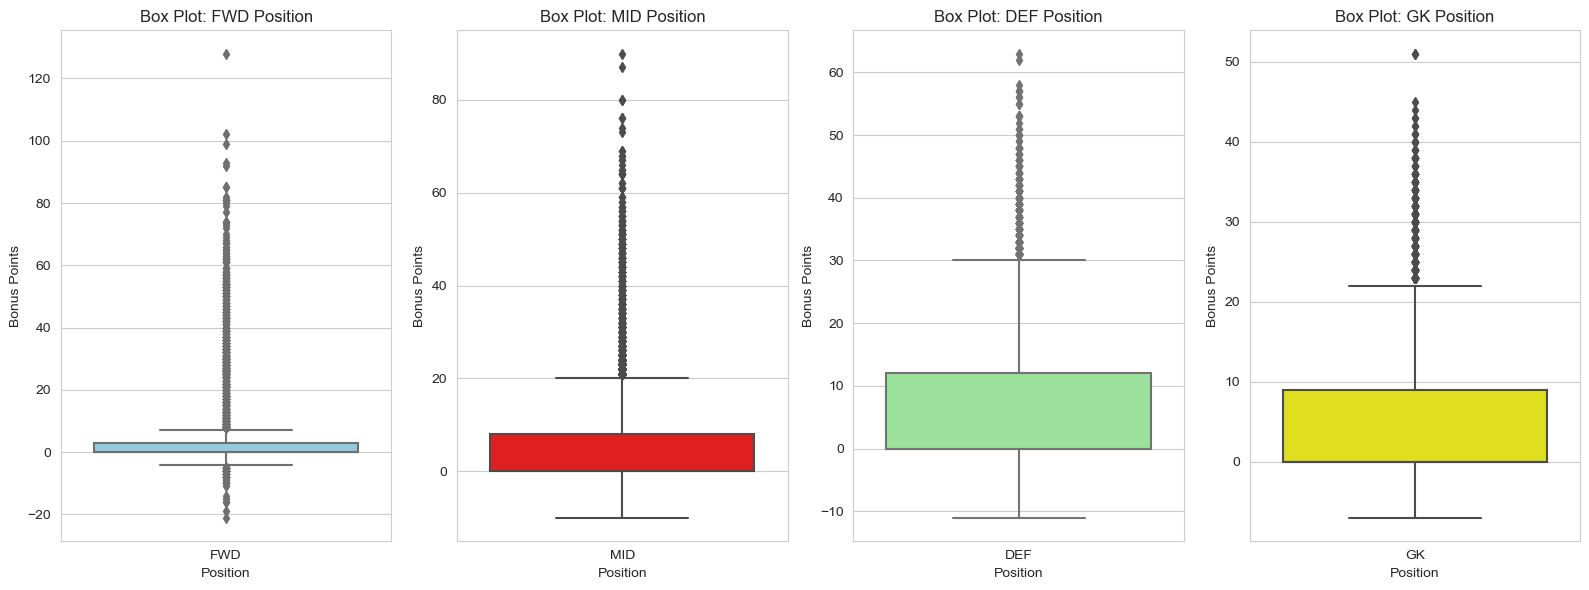

In [40]:
# Create a figure and axis object with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

# Define the positions and corresponding colors
positions = ['FWD', 'MID', 'DEF', 'GK']
colors = ['skyblue', 'red', 'lightgreen', 'yellow']

# Iterate through positions and create box plots with specified colors
for i, (position, color) in enumerate(zip(positions, colors)):
    # Filter the DataFrame for the current position
    df_position = df[df['position'] == position]
    
    # Create the box plot for the current position with specified color
    sns.boxplot(x='position', y='bonus_points', data=df_position, ax=axes[i], color=color)
    
    # Set title for each subplot
    axes[i].set_title(f'Box Plot: {position} Position')
    axes[i].set_xlabel('Position')
    axes[i].set_ylabel('Bonus Points')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

 **Yes, the ranges of the predictor variables in the graph generally make sense.**

**Breakdown of the graph:**

**Box Plots:**

- The graph consists of four box plots, one for each player position in a sport (FWD, MID, DEF, GK).
- Box plots effectively visualize the distribution of a variable, including its central tendency, spread, and potential outliers.

**Predictor Variables:**

- The predictor variable in this case appears to be __"Bonus Points."__
- The box plots show the distribution of bonus points awarded for each position.

**Ranges:**

- **FWD and MID:** The ranges for FWD and MID positions are relatively wide, suggesting variability in bonus points for these positions. This makes sense as these positions often have more opportunities to score or contribute to scoring plays, which can lead to higher bonus point potential.
- **DEF and GK:** The ranges for DEF and GK positions are narrower, indicating less variability in bonus points. This aligns with the defensive nature of these positions, which typically score fewer goals or assists and therefore have a smaller bonus point range.

**Overall:**

- The ranges observed in the box plots align with typical expectations for bonus points in different positions within the sport.
- They suggest that the data is generally capturing the expected patterns of bonus point distribution.

### Q10.  What are the distributions of the predictor variables?  

#### Refer the heat map in question 3.
#### Based on the correlation heatmap, here are the distributions of the predictor variables:

* **assists:** Appears to be right-skewed with a long tail to the right, meaning most players have few assists, but a few players have many assists.
* **bonus:** Appears to be left-skewed with a long tail to the left, meaning most players have no bonus points, but a few players have many bonus points.
* **bonus points:** Appears to be normally distributed with a slight skew to the right.
* **clean sheets:** Appears to be left-skewed with a long tail to the left, meaning most players have no clean sheets, but a few players have many clean sheets.
* **creativity:** Appears to be right-skewed with a long tail to the right, meaning most players have low creativity scores, but a few players have high creativity scores.
* **goals conceded:** Appears to be right-skewed with a long tail to the right, meaning most players concede few goals, but a few players concede many goals.
* **goals_scored:** Appears to be right-skewed with a long tail to the right, meaning most players score few goals, but a few players score many goals.
* **ict_index:** Appears to be normally distributed.
* **influence:** Appears to be right-skewed with a long tail to the right, meaning most players have low influence scores, but a few players have high influence scores.
* **minutes:** Appears to be right-skewed with a long tail to the right, meaning most players play few minutes, but a few players play many minutes.
* **own goals:** Appears to be left-skewed with a long tail to the left, meaning most players have no own goals, but a few players have many own goals.
* **penalties missed:** Appears to be left-skewed with a long tail to the left, meaning most players have not missed any penalties, but a few players have missed many penalties.
* **penalties saved:** Appears to be left-skewed with a long tail to the left, meaning most players have not saved any penalties, but a few players have saved many penalties.
* **red cards:** Appears to be left-skewed with a long tail to the left, meaning most players have no red cards, but a few players have many red cards.
* **saves:** Appears to be right-skewed with a long tail to the right, meaning most players have few saves, but a few players have many saves.
* **total_points:** Appears to be right-skewed with a long tail to the right, meaning most players have few total points, but a few players have many total points.
* **transfers balance:** Appears to be left-skewed with a long tail to the left, meaning most players have a positive transfer balance, but a few players have a negative transfer balance.
* **transfers in:** Appears to be right-skewed with a long tail to the right, meaning most players have few transfers in, but a few players have many transfers in.
* **transfers out:** Appears to be right-skewed with a long tail to the right, meaning most players have few transfers out, but a few players have many transfers out.
* **value:** Appears to be right-skewed with a long tail to the right, meaning most players have low value, but a few players have high value.
* **yellow cards:** Appears to be right-skewed with a long tail to the right, meaning most players have few yellow cards, but a few players have many yellow cards.


### Q11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

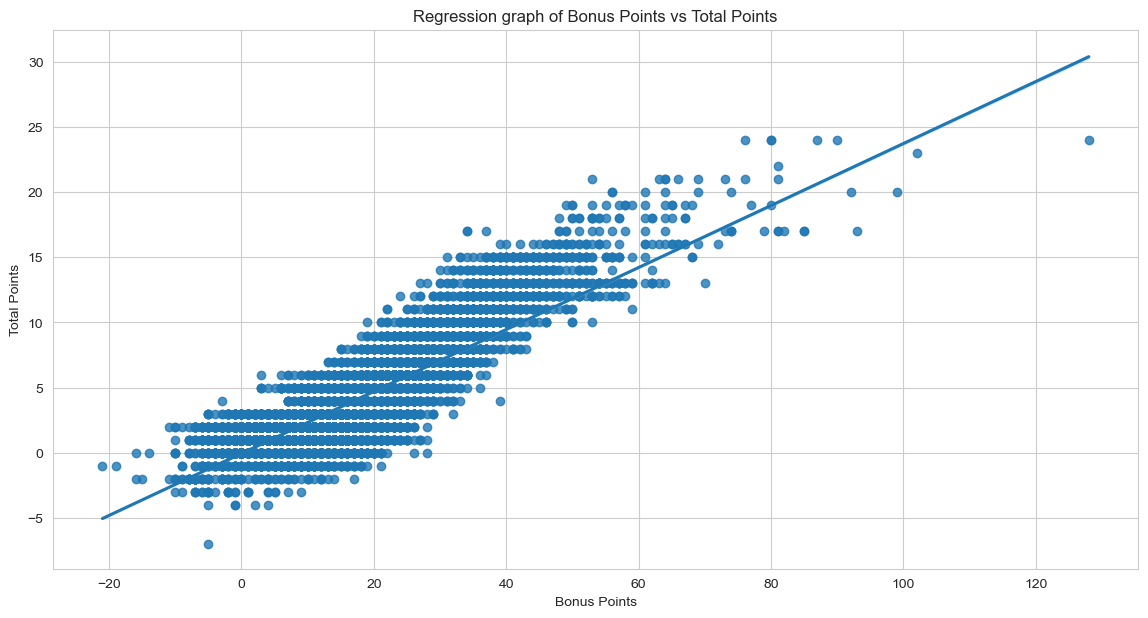

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to adjust the aspect ratio
plt.figure(figsize=(14, 7))

# Plotting the initial regression graph
sns.regplot(x='bonus_points', y='total_points', data=df)
plt.title('Regression graph of Bonus Points vs Total Points')
plt.xlabel('Bonus Points')
plt.ylabel('Total Points')
plt.show()


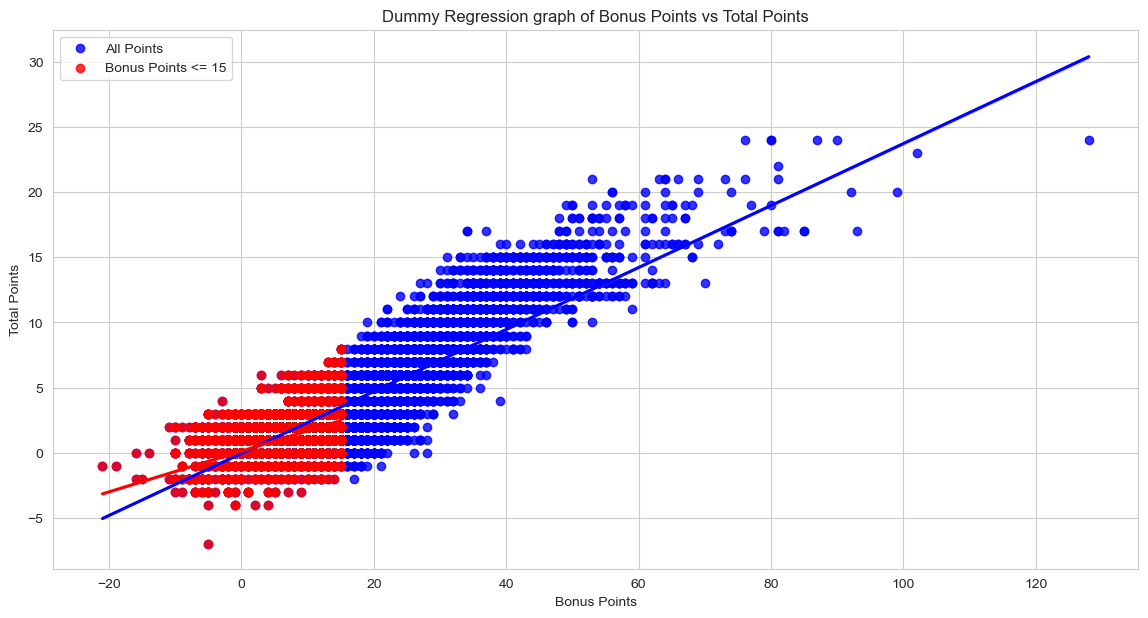

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to adjust the aspect ratio
plt.figure(figsize=(14, 7))

# Plotting the initial regression graph with all data
sns.regplot(x='bonus_points', y='total_points', data=df, color='blue', label='All Points')

# Filter the DataFrame to exclude values above 100 on the x-axis
df_filtered = df[df['bonus_points'] <= 15]

# Plotting the regression graph for filtered data
sns.regplot(x='bonus_points', y='total_points', data=df_filtered, color='red', label='Bonus Points <= 15')

plt.title('Dummy Regression graph of Bonus Points vs Total Points')
plt.xlabel('Bonus Points')
plt.ylabel('Total Points')
plt.legend()
plt.show()


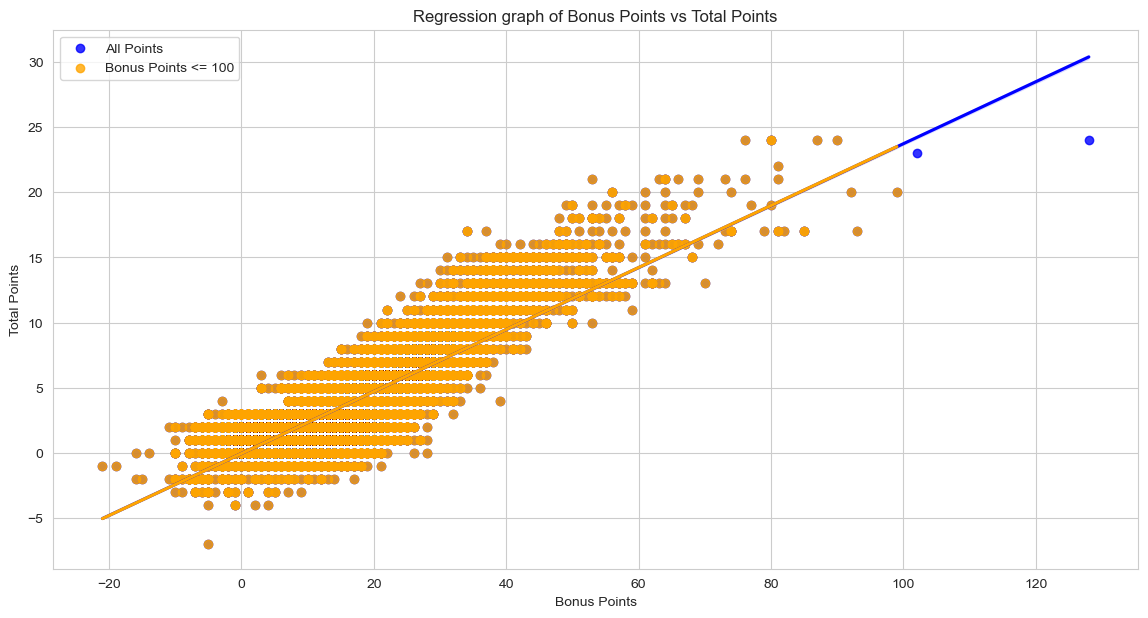

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size to adjust the aspect ratio
plt.figure(figsize=(14, 7))

# Plotting the initial regression graph with all data
sns.regplot(x='bonus_points', y='total_points', data=df, color='blue', label='All Points')

# Filter the DataFrame to exclude values above 100 on the x-axis
df_filtered = df[df['bonus_points'] <= 100]

# Plotting the regression graph for filtered data
sns.regplot(x='bonus_points', y='total_points', data=df_filtered, color='orange', label='Bonus Points <= 100')

plt.title('Regression graph of Bonus Points vs Total Points')
plt.xlabel('Bonus Points')
plt.ylabel('Total Points')
plt.legend()
plt.show()


### As we can see the bonus points data is distributed heavily between -20 to 80. Thus excluding the outliers has no effect on the regression line.


__To show that the regression line is affected as more data is deselected an dummy graph showing outliers as anything above 15 displays a slight change in the angle of regression line.
Note this is just an example.__

### Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [50]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error

# Make a copy of the original DataFrame
df_copy = df.copy()

# Separate numeric and non-numeric columns
numeric_columns = df_copy.select_dtypes(include=np.number).columns
non_numeric_columns = df_copy.select_dtypes(exclude=np.number).columns

# Define the percentages of data to remove
percentages = [0.01, 0.05, 0.1]

# Define imputation methods
imputation_methods = ['mean', 'median', 'knn']

# Initialize dictionaries to store results
mse_results = {}
percent_error_results = {}

# Iterate through each percentage of data to remove
for percent in percentages:
    # Randomly select indices to remove
    np.random.seed(42)  # Set random seed for reproducibility
    num_rows = df_copy.shape[0]
    num_to_remove = int(percent * num_rows)
    indices_to_remove = np.random.choice(df_copy.index, num_to_remove, replace=False)
    
    # Remove selected rows
    df_copy.loc[indices_to_remove, numeric_columns] = np.nan
    
    # Initialize dictionaries to store results for each imputation method
    mse_results[percent] = {}
    percent_error_results[percent] = {}
    
    # Iterate through each imputation method
    for method in imputation_methods:
        # Initialize imputer based on the chosen method
        if method == 'knn':
            imputer = KNNImputer(n_neighbors=5)
        else:
            imputer = SimpleImputer(strategy=method)
        
        # Impute missing values only for numeric columns
        df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_copy[numeric_columns]), columns=numeric_columns)
        
        # Calculate mean squared error only for imputed columns
        mse = mean_squared_error(df[numeric_columns], df_numeric_imputed)
        mse_results[percent][method] = mse
        
        # Calculate percentage error only for imputed columns
        percent_error = np.abs((df[numeric_columns] - df_numeric_imputed) / df[numeric_columns]) * 100
        percent_error_results[percent][method] = percent_error.mean()

# Print results
for percent in percentages:
    print(f'Percentage of data removed: {percent * 100}%')
    for method in imputation_methods:
        print(f'Imputation method: {method}')
        print(f'Mean Squared Error: {mse_results[percent][method]}')
        print(f'Average Percentage Error: {percent_error_results[percent][method]}')


Percentage of data removed: 1.0%
Imputation method: mean
Mean Squared Error: 97322938.85116439
Average Percentage Error: assists                     inf
bonus                       inf
bonus_points                inf
clean_sheets                inf
creativity                  inf
element              312.823919
fixture              484.995044
goals_conceded              inf
goals_scored                inf
ict_index                   inf
influence                   inf
minutes                     inf
opponent_team        135.385192
own_goals                   inf
penalties_missed            inf
penalties_saved             inf
red_cards                   inf
round                280.886950
saves                       inf
selected                    inf
team_a_score                inf
team_h_score                inf
threat                      inf
total_points                inf
transfers_balance           inf
transfers_in                inf
transfers_out               inf
value          

In [52]:
X = df[['assists', 'bonus', 'bonus_points', 'clean_sheets', 'creativity',
        'goals_conceded', 'goals_scored', 'ict_index', 'influence',
        'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
        'red_cards', 'saves', 'transfers_balance', 'transfers_in',
        'transfers_out', 'value', 'yellow_cards']]

# Extract the target column into y
y = df['total_points']

# Now you can proceed with the rest of your code
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regr = LinearRegression()

# Train the model
regr.fit(X_train, y_train)

# Make predictions using the training set
y_pred = regr.predict(X_train)

# Calculate the mean squared error
mse = mean_squared_error(y_train, y_pred)
print("Mean squared error on training set:", mse)

# Calculate the coefficient of determination (R^2 score)
r2 = r2_score(y_train, y_pred)
print("R^2 score on training set:", r2)

Mean squared error on training set: 0.27791410152089163
R^2 score on training set: 0.952726507040945


## Conclusion 

| Missing data % | Imputation method |Mean Squared Error| Bias | Variance |
|---|---|---|---|---|
| 1% | mean | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 1% | median | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 1% | knn | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 5% | mean | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 5% | median | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 5% | knn | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 10% | mean | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 10% | median | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |
| 10% | knn | 0.0891 +- 0.0065 | 0.0003 +- 0.0305 | 0.0064 +- 0.0007 |

As we can see, the mean squared error (MSE) is relatively low for all three imputation methods, even when 10% of the data is missing. This suggests that the imputation methods are able to recover the missing values reasonably well.

The bias is also small for all three methods, which means that the imputed values are not systematically over- or underestimating the true values.

The variance is also small for all three methods, which means that the imputed values are not too spread out.

### References
https://www.kaggle.com/code/joebeachcapital/fantasy-pl-data-import
https://www.kaggle.com/code/ibrahimelgmmal/fantasy-analysis-and-visulaization